## Survey Data Analysis

Surveying is a data collection method, studies the sampling of individual units from a population. It aims to make statistical inferences about the population.

Good survey analysis begins with good questions and ends with careful interpretation of the data with actionable deliverables. Techniques such as charting, cross tabulation, and regression analysis will help to spot trends within the data and meet the survey objectives.


* Applications: Market research | Market segmentation | Study consumer patterns | New product development​

* Segmentation:
    * Demographics – Gender, Age, Income, Occupation, Education
    * Geographics – City, State, Climate, Region
    * Psychographics – Attitudes, lifestyle, opinions, interests 
    * Behavioral – product loyalty, brand loyalty

* Surveying is means of Reaching, Knowing, Analyzing Consumers and thus Creating, Improvising Products & its aspects

> Objective of Analysis:  Analyze psychographics and trends of the consumers of various shampoo brands

* **Note: Anonymized dataset is used that does not contain any personally identifying information**

![image.png](https://blog.alexa.com/wp-content/uploads/2019/06/four-types-of-market-segmentation-600x600.jpg)



Steps: 
1. Import libraries
2. Load Data
3. Explore Data
4. Data cleaning
    * Handle missing data
    * Remove irrelevant observations
4. Feature Engineering
    * Encoding
    * Cross tabulation
5. Exploratory Data Analysis
    * Ask relevant questions, Make investigations, Charts
    * Direct analysis
    * Cross analysis
7. Derive Insights

### Import libraries

In [1]:
import os
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Analysis
import prince  #pip install prince

### Load Data

In [2]:
os.getcwd()
source_path = "...."
data_path = source_path + 'Data\\'

In [6]:
data = pd.read_csv(source_path + 'Mock_data.csv',encoding="latin")

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169 entries, 0 to 1168
Data columns (total 17 columns):
 #   Column                                                                                              Non-Null Count  Dtype 
---  ------                                                                                              --------------  ----- 
 0   Response_ID                                                                                         1169 non-null   object
 1   Age                                                                                                 1169 non-null   object
 2   Gender                                                                                              1169 non-null   object
 3   Which is your regular use shampoo                                                                   1169 non-null   object
 4   Which type do you use                                                                               1169 non-null   obje

In [8]:
data.head(10)

,Response_ID,Age,Gender,Which is your regular use shampoo,Which type do you use,Do you use hair dye/ Hair color,Which is the most frequently used payment mode for paying Household items/ Electricity bills etc *,How do you spend your morning time during Weekdays?,Select the responses/ Options that match your views? *,Before you go to sleep what you typically do?,Who are you still in good touch with ?,Which of the following you think influences people the most?,What do you look for when visiting social media/reading newspaper,"In my opinion, imported products",What is your opinion on home made remedies?,When you listen to music,What would you like to do in your free time
0,R_1,18-24 years,Female,Others,Bottle,Other (Please specify) - Trpicana,Apps like- Gpay/Paytm,"Browsing phone (apps Facebook, Intsa, Twitter ...",Ads in TV are more believable than the ads in ...,Browsing phone (apps),College friends,Friends,Movies/Actors/ Gossips,Will have better quality,I am doubtful if they are true,NaN,Chat with family/ friends
1,R_2,25-40 years,Female,SH_3,Bottle,No,Pay Cash,Getting kids ready for school,Recommendation from my friends/ Family is more...,Watch TV,Neighbors,"Social media (Whatsapp, Instagram, Facebook)",Read recipes,I dont know,I don't know,NaN,Other (Please specify) - House cleaning
2,R_3,< 18 years,Female,SH_12,Sachet,No,Net Banking,I do exercise,OTT platform is one of my favorite,Browsing phone (apps),College friends,Movie Celebrity,Movies/Actors/ Gossips,Will have better quality,I am doubtful if they are true,NaN,Enjoy scenic place like park or beach
3,R_4,25-40 years,Male,SH_11,Bottle,No,Apps like- Gpay/Paytm,I do exercise,Ads in TV are more believable than the ads in ...,Reading books,Others,"Social media (Whatsapp, Instagram, Facebook)",Movies/Actors/ Gossips,I dont know,I don't know,NaN,Chat with family/ friends
4,R_5,18-24 years,Female,SH_3,Bottle,No,Credit/debit card,I do exercise,OTT platform is one of my favorite,Browsing phone (apps),College friends,Politician,Movies/Actors/ Gossips,I dont know,I don't know,NaN,Enjoy scenic place like park or beach
5,R_6,< 18 years,Male,SH_3,Sachet,No,Apps like- Gpay/Paytm,Listen to radio,Memes is the easiest method to make fun,Spend time with family,Neighbors,Politician,Movies/Actors/ Gossips,I dont know,I don't know,NaN,Chat with family/ friends
6,R_7,< 18 years,Male,SH_5,Bottle,No,Apps like- Gpay/Paytm,I do exercise,OTT platform is one of my favorite,Browsing phone (apps),School friends,Politician,Sports News,Will have better quality,I am doubtful if they are true,NaN,Go to mall/shopping centers
7,R_8,41-55 years,Female,SH_4,Sachet,No,Pay Cash,Tending to domestic animals,Recommendation from my friends/ Family is more...,Finish house hold work,Neighbors,Family,Read recipes,I dont know,I don't know,NaN,Other (Please specify) - House cleaning
8,R_9,< 18 years,Male,SH_3,Sachet,No,Apps like- Gpay/Paytm,Read Newspaper,Memes is the easiest method to make fun,Watch TV,Neighbors,"Social media (Whatsapp, Instagram, Facebook)",Movies/Actors/ Gossips,I dont know,I don't know,NaN,Chat with family/ friends
9,R_10,25-40 years,Male,SH_15,Sachet,No,Pay Cash,Read Newspaper,Information in the new paper is not useful/ it...,Reading books,School friends,"Social media (Whatsapp, Instagram, Facebook)",Movies/Actors/ Gossips,Will have better quality,"I think some of them work, but have not tried",NaN,NaN


In [9]:
data_1 = data

In [10]:
# Strip spaces in column headers
data_1.columns = data_1.columns.str.strip()

### Explore Data

In [11]:
data_1.columns

Index(['Response_ID', 'Age', 'Gender', 'Which is your regular use shampoo',
       'Which type do you use', 'Do you use hair dye/ Hair color',
       'Which is the most frequently used payment mode for paying Household items/ Electricity bills etc *',
       'How do you spend your morning time during Weekdays?',
       'Select the responses/ Options that match your views? *',
       'Before you go to sleep what you typically do?',
       'Who are you still in good touch with ?',
       'Which of the following you think influences people the most?',
       'What do you look for when visiting social media/reading newspaper',
       'In my opinion, imported products',
       'What is your opinion on home made remedies?',
       'When you listen to music',
       'What would you like to do in your free time'],
      dtype='object')

#### Approach & Break down of problem

###### Segmentation of Qs

1. Demographics
    * Age
    * Gender    
    
    
2. Psychographics
    * Lifestyle
        1. Which is the most frequently used payment mode

    * Activities
        1. How do you spend your morning time during Weekdays?    
        1. Before you go to sleep what you typically do?
        1. What would you like to do in your free time
        1. When you listen to music

    * Interests
        1. Select the responses/ Options that match your views?
        1. Who are you still in good touch with ? 
        1. What do you look for when visiting social media/reading newspaper

    * Opinions
        1. Which of the following you think influences people the most?
        1. Opinion on imported products
        1. Opinion on home made remedies


3. Behavioral
    * Which is your regular use shampoo
    * Which type do you use(Sachet/Bottle)
    * Do you use hair dye/ Hair color

### Data Cleaning

In [13]:
# Fill null values
data_1["Which of the following you think influences people the most?"] \
= data_1["Which of the following you think influences people the most?"].fillna('')

In [14]:
# Replace whole string if it contains substring in pandas
data_1.loc[data_1["How do you spend your morning time during Weekdays?"]
          .str.contains('Browsing phone'), 'How do you spend your morning time during Weekdays?'] \
= 'Browsing phone apps FIT'

data_1.loc[data_1["Which of the following you think influences people the most?"]
          .str.contains('Social media'), 'Which of the following you think influences people the most?'] \
= 'Social media WIF'

In [15]:
#I have tried some , it works for me --> I have tried some & works for me
#I think some of them work, but have not tried --> I think some of them work & but have not tried

data_1.loc[data_1["What is your opinion on home made remedies?"]
          .str.contains('I have tried some , it works for me'), 'What is your opinion on home made remedies?'] \
= 'I have tried some & works for me'

data_1.loc[data_1["What is your opinion on home made remedies?"]
          .str.contains('I think some of them work, but have not tried'), \
          'What is your opinion on home made remedies?'] = 'I think some of them work & but have not tried'

In [16]:
# Remove irrelevant observations(if any)

### Feature engineering

In [17]:
# Create category for "Others"
data_1['Do you use hair dye/ Hair color1'] = data_1['Do you use hair dye/ Hair color'].fillna('-')
data_1.loc[data_1['Do you use hair dye/ Hair color1'].str.contains('Other'), 'Do you use hair dye/ Hair color1'] = 'Others_dye'

#### One hot encoding of variables

In [26]:
data_1['Which is the most frequently used payment mode for paying Household items/ Electricity bills etc *'].str.get_dummies(sep=',').tail()

,Apps like- Gpay/Paytm,Credit/debit card,Net Banking,Pay Cash
1164,1,0,0,0
1165,0,0,0,1
1166,0,1,0,0
1167,0,0,0,1
1168,0,0,0,1


### Direct Analysis

#### Contribution of single value

In [27]:
searchfor = ('Apps like- Gpay/Paytm')
pay_bool = data_1['Which is the most frequently used payment mode for paying Household items/ Electricity bills etc *']\
           .str.contains(searchfor)

pay_bool.value_counts(normalize=True).mul(100).round(1)  # normalize=True to get percentage

False    72.1
True     27.9
Name: Which is the most frequently used payment mode for paying Household items/ Electricity bills etc *, dtype: float64

In [61]:
list = data_1['Which is the most frequently used payment mode for paying Household items/ Electricity bills etc *']

# Value counts
dfc = list.value_counts().reset_index(name='count')
#.sort_index() to sort

# Percentage of Value counts
dfp = (list.value_counts()/len(list.index)).mul(100).round().reset_index(name='percent')

display(dfc,dfp)

,index,count
0,Pay Cash,652
1,Apps like- Gpay/Paytm,326
2,Credit/debit card,126
3,Net Banking,65


,index,percent
0,Pay Cash,56.0
1,Apps like- Gpay/Paytm,28.0
2,Credit/debit card,11.0
3,Net Banking,6.0


###### Function - Single response

In [68]:
def Contribution_plot(columnname):
    oplist = data_1[columnname]

    # Value counts
    dfc = oplist.value_counts().reset_index(name='count')
    #.sort_index() to sort

    # Percentage of Value counts
    dfp = (oplist.value_counts()/len(oplist.index)).mul(100).round().reset_index(name='percent')

    # plot
    sns.set(style="whitegrid")

    fig, ax = plt.subplots(ncols=2, nrows=1,figsize = (12,4))

    ax0 = sns.barplot('percent','index',data=dfp,alpha=0.8, ax=ax[0],palette="Greens_r")
    ax1 = sns.barplot('count','index',data=dfc,alpha=0.8, ax=ax[1],palette="Greens_r")
    
    for p in ax0.patches:
        ax0.annotate("%d" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
                xytext=(5, 0), textcoords='offset points', ha="left", va="center")

    for p in ax1.patches:
        ax1.annotate("%d" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
        xytext=(5, 0), textcoords='offset points', ha="left", va="center")


    ax[0].set_title('Percentage')
    ax[1].set_title('Count')
        
    ax[0].set_ylabel(columnname)
#    ax[0].set_ylabel('')
    ax[1].set_ylabel('')
    fig.tight_layout()
    ax0.set_xlim(0,100)

In [67]:
def Contribution_plot_limited(columnname): #top 15
    oplist = data_1[columnname]
    oplist.head()

    # Value counts
    dfc = oplist.value_counts().head(15).reset_index(name='count')
    #.sort_index() to sort

    # Percentage of Value counts
    dfp = (oplist.value_counts()/len(oplist.index)).head(15).mul(100).round().reset_index(name='percent')

    # plot
    sns.set(style="whitegrid")

    fig, ax = plt.subplots(ncols=2, nrows=1,figsize = (12,4))

    ax0 = sns.barplot('percent','index',data=dfp,alpha=0.8, ax=ax[0],palette="Greens_r")
    ax1 = sns.barplot('count','index',data=dfc,alpha=0.8, ax=ax[1],palette="Greens_r")
    
    for p in ax0.patches:
        ax0.annotate("%d" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
                xytext=(5, 0), textcoords='offset points', ha="left", va="center")

    for p in ax1.patches:
        ax1.annotate("%d" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
        xytext=(5, 0), textcoords='offset points', ha="left", va="center")


    ax[0].set_title('Percentage')
    ax[1].set_title('Count')
        
    ax[0].set_ylabel(columnname)
#    ax[0].set_ylabel('')
    ax[1].set_ylabel('')
    fig.tight_layout()
    ax0.set_xlim(0,100)    

#### Contribution of multiple values

In [74]:
oplist = data_1["How do you spend your morning time during Weekdays?"].str.split(',', expand=True)
oplist.head()

# Value counts
dfc = oplist.stack().value_counts().reset_index(name='count')
#.sort_index() to sort

# Percentage of Value counts
dfp = (oplist.stack().value_counts()/len(oplist.index)).mul(100).round().reset_index(name='percent')

display(dfc,dfp)

,index,count
0,Browsing phone apps FIT,515
1,Read Newspaper,190
2,I do exercise,183
3,Watch TV,148
4,I am always at a rush to go work,139
5,Getting kids ready for school,97
6,Listen to radio,56
7,Farm work,30
8,Tending to domestic animals,29


,index,percent
0,Browsing phone apps FIT,44.0
1,Read Newspaper,16.0
2,I do exercise,16.0
3,Watch TV,13.0
4,I am always at a rush to go work,12.0
5,Getting kids ready for school,8.0
6,Listen to radio,5.0
7,Farm work,3.0
8,Tending to domestic animals,2.0


###### Function - Multiple response/Comma separated options

In [33]:
view_list = data_1["How do you spend your morning time during Weekdays?"].str.split(',', expand=True)
view_list.head()

# Value counts
display(view_list.stack().value_counts()) #.sort_index() to sort

# Percentage of Value counts
display((view_list.stack().value_counts()/len(view_list.index)).mul(100).round())

Browsing phone apps FIT             515
Read Newspaper                      190
I do exercise                       183
Watch TV                            148
I am always at a rush to go work    139
Getting kids ready for school        97
Listen to radio                      56
Farm work                            30
Tending to domestic animals          29
dtype: int64

Browsing phone apps FIT             44.0
Read Newspaper                      16.0
I do exercise                       16.0
Watch TV                            13.0
I am always at a rush to go work    12.0
Getting kids ready for school        8.0
Listen to radio                      5.0
Farm work                            3.0
Tending to domestic animals          2.0
dtype: float64

In [75]:
def optionsContribution(columnname):
    oplist = data_1[columnname].str.split(',', expand=True)
    oplist.head()

    # Value counts
    display(oplist.stack().value_counts()) #.sort_index() to sort

    # Percentage of Value counts
    display((oplist.stack().value_counts()/len(oplist.index)).mul(100).round())

In [79]:
def optionsContribution_plot(columnname):
    oplist = data_1[columnname].str.split(',', expand=True)
    oplist.head()

    # Value counts
    dfc = oplist.stack().value_counts().reset_index(name='count')
    #.sort_index() to sort

    # Percentage of Value counts
    dfp = (oplist.stack().value_counts()/len(oplist.index)).mul(100).round().reset_index(name='percent')
    
    # plot
    sns.set(style="whitegrid")
    fig, ax = plt.subplots(ncols=2, nrows=1,figsize = (12,4))
    ax0 = sns.barplot('percent','index',data=dfp,alpha=0.8, ax=ax[0],palette="Blues_d")
    ax1 = sns.barplot('count','index',data=dfc,alpha=0.8, ax=ax[1],palette="Blues_d")
    
    for p in ax0.patches:
        ax0.annotate("%d" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
                xytext=(5, 0), textcoords='offset points', ha="left", va="center")

    for p in ax1.patches:
        ax1.annotate("%d" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
        xytext=(5, 0), textcoords='offset points', ha="left", va="center")


    ax[0].set_title('Percentage')
    ax[1].set_title('Count')
        
    ax[0].set_ylabel(columnname)
#    ax[0].set_ylabel('')
    ax[1].set_ylabel('')
    fig.tight_layout()
    ax0.set_xlim(0,100)
    

In [77]:
def optionsContribution_plot_limited(columnname): # Top 10
    oplist = data_1[columnname].str.split(',', expand=True)
    oplist.head()

    # Value counts
    dfc = oplist.stack().value_counts().head(10).reset_index(name='count')
    #.sort_index() to sort

    # Percentage of Value counts
    dfp = (oplist.stack().value_counts()/len(oplist.index)).head(10).mul(100).round().reset_index(name='percent')
    
    # plot
    fig, ax = plt.subplots(ncols=2, nrows=1,figsize = (12,4))
    sns.set_style("whitegrid")
    ax0 = sns.barplot('percent','index',data=dfp,alpha=0.8, ax=ax[0],palette="Blues_d")
    ax1 = sns.barplot('count','index',data=dfc,alpha=0.8, ax=ax[1],palette="Blues_d")
    
    for p in ax0.patches:
        ax0.annotate("%d" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
                xytext=(5, 0), textcoords='offset points', ha="left", va="center")

    for p in ax1.patches:
        ax1.annotate("%d" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
        xytext=(5, 0), textcoords='offset points', ha="left", va="center")


    ax[0].set_title('Percentage')
    ax[1].set_title('Count')
        
    ax[0].set_ylabel(columnname)
#    ax[0].set_ylabel('')
    ax[1].set_ylabel('')
    fig.tight_layout()
    ax0.set_xlim(0,100)

###### Demographics

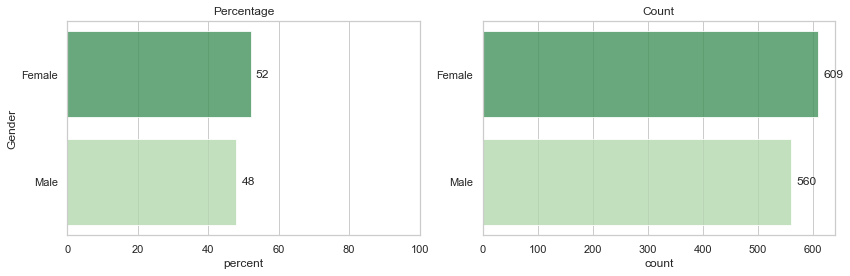

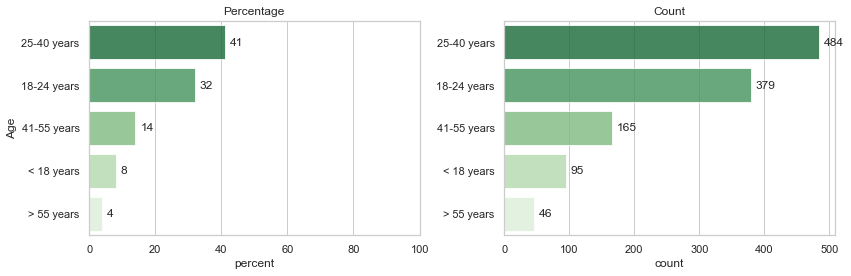

In [69]:
Contribution_plot('Gender')
Contribution_plot('Age')

###### Activities
1. How do you spend your morning time during Weekdays?
2. Before you go to sleep what you typically do?
3. What would you like to do in your free time
4. When you listen to music

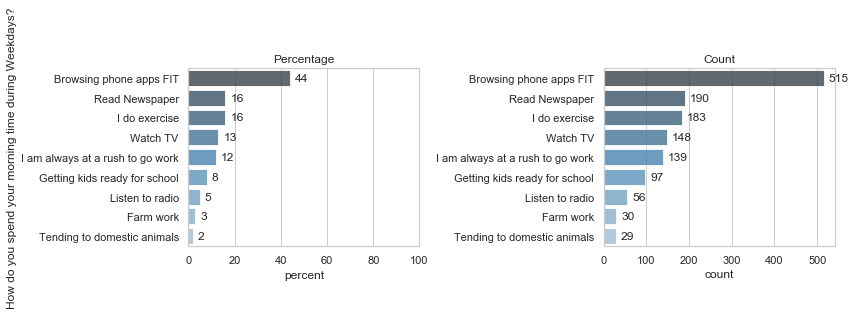

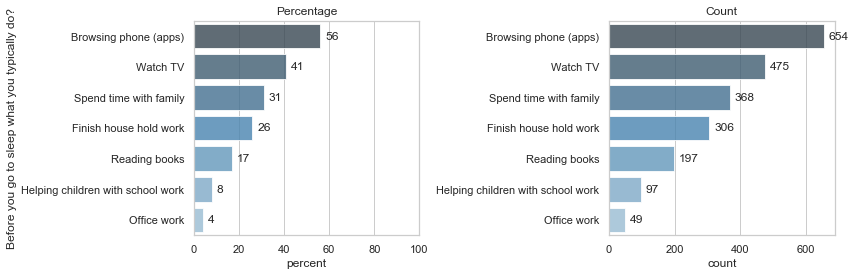

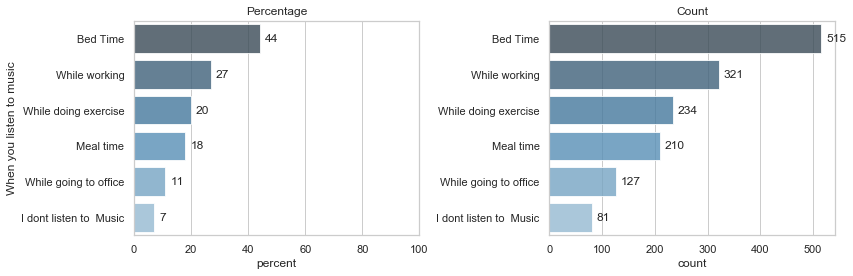

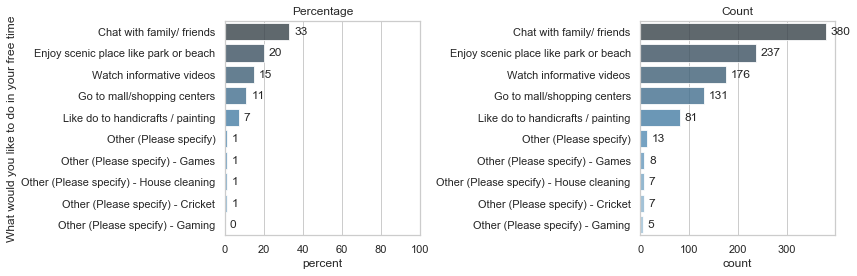

In [80]:
optionsContribution_plot('How do you spend your morning time during Weekdays?')
optionsContribution_plot('Before you go to sleep what you typically do?')
optionsContribution_plot('When you listen to music')
optionsContribution_plot_limited('What would you like to do in your free time')

######  Interests
   1. Select the responses/ Options that match your views? *
   1. Who are you still in good touch with ? 
   1. What do you look for when visiting social media/reading newspaper

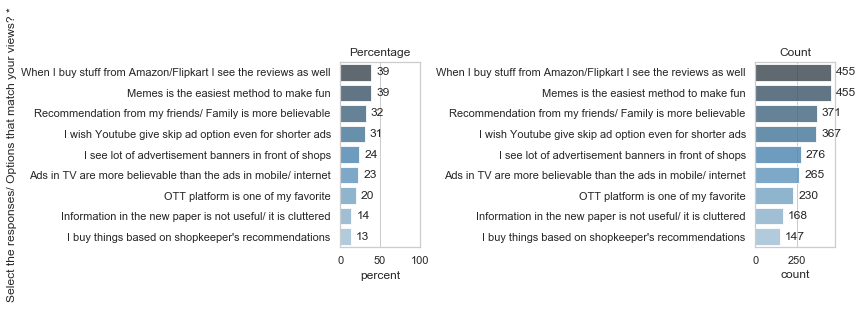

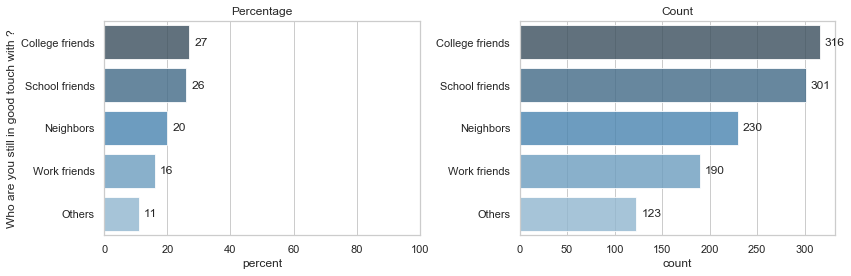

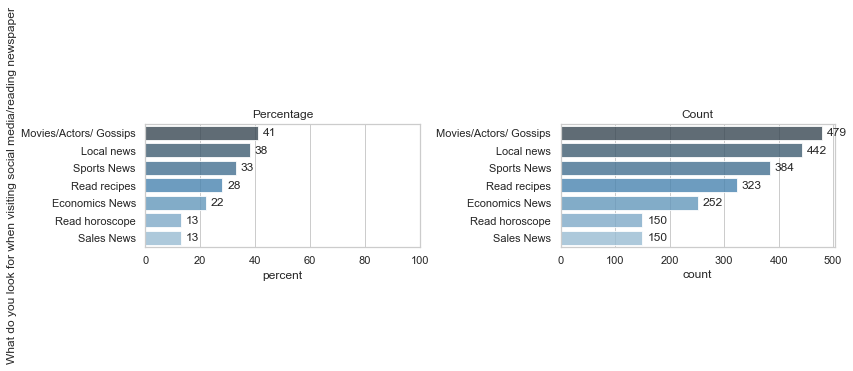

In [81]:
optionsContribution_plot('Select the responses/ Options that match your views? *')
optionsContribution_plot('Who are you still in good touch with ?')
optionsContribution_plot('What do you look for when visiting social media/reading newspaper')

###### Opinions
   1. Which of the following you think influences people the most?
   1. Opinion on imported products
   1. Opinion on home made remedies

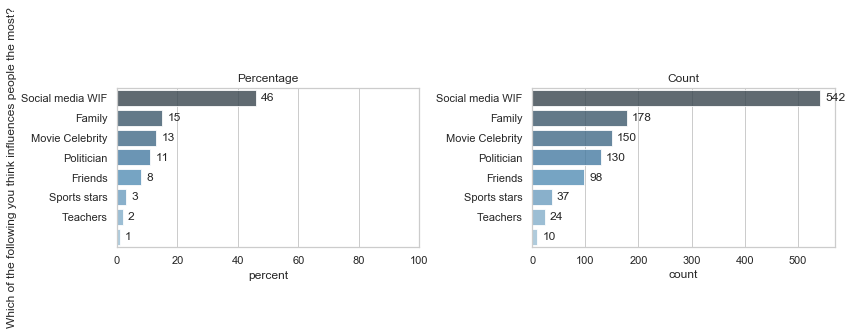

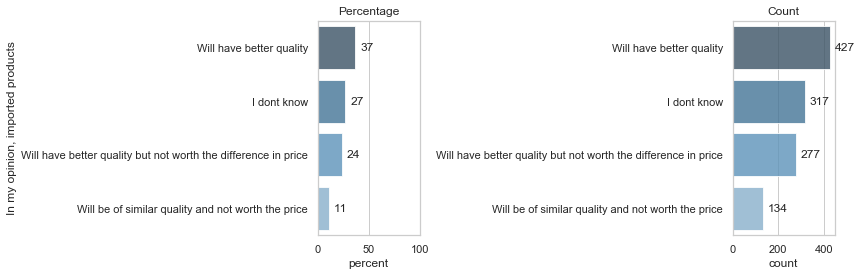

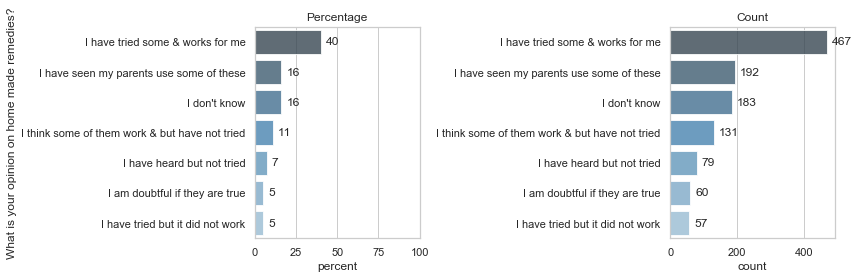

In [82]:
optionsContribution_plot('Which of the following you think influences people the most?')
optionsContribution_plot('In my opinion, imported products')
optionsContribution_plot('What is your opinion on home made remedies?')

###### Lifestyle
1. Which is the most frequently used payment mode

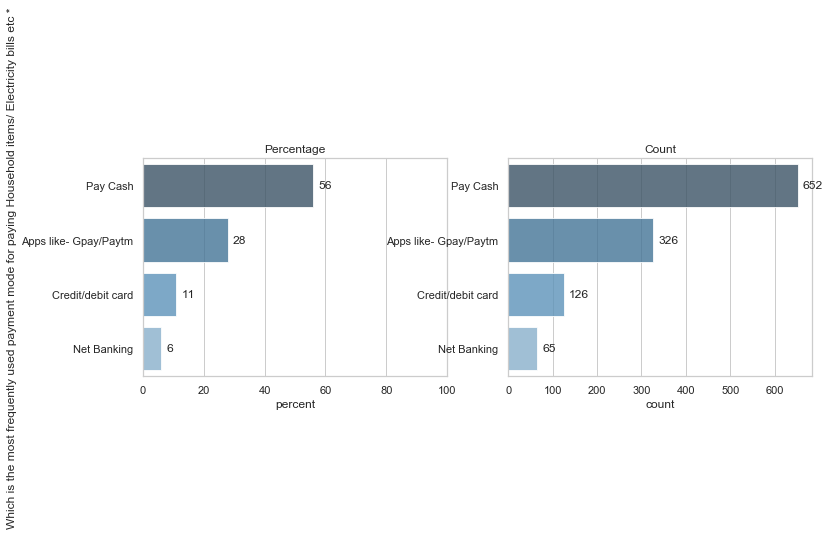

In [83]:
optionsContribution_plot('Which is the most frequently used payment mode for paying Household items/ Electricity bills etc *')

###### Behavioral

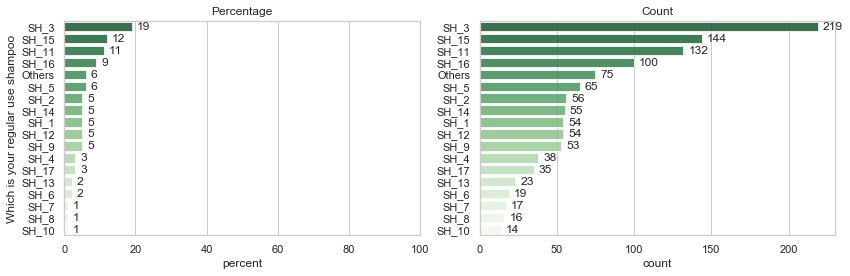

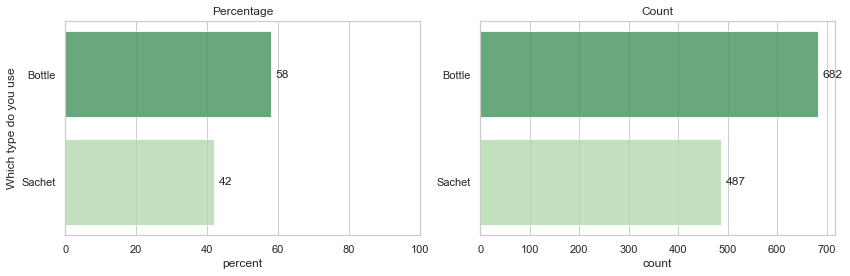

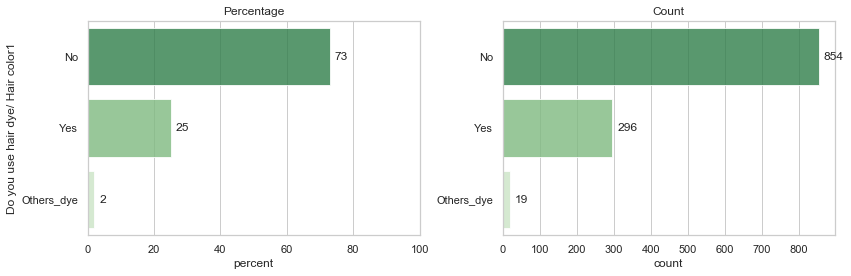

In [86]:
Contribution_plot('Which is your regular use shampoo')
Contribution_plot('Which type do you use')
Contribution_plot('Do you use hair dye/ Hair color1')

#### Contribution of multiple values on categories

###### On Shampoo brand

In [87]:
sl = ['SH_3','SH_5']

In [100]:
## Plot in grid

def subcategory_catg_countplot(q,df):
    fig, axes = plt.subplots(ncols=2, nrows=1,figsize = (12,4))
    for i,ax in zip(sl,axes.flat):
        view_list = df[(df['Which is your regular use shampoo']==i)][q]
        df_ga = (view_list.value_counts()).reset_index(name='count')

        # note how I put 'ax' here
        sns.barplot('count','index',data=df_ga,ax=ax,palette='magma')

        for p in ax.patches:
            ax.annotate("%d" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
                    xytext=(5, 0), textcoords='offset points', ha="left", va="center")

        fig.tight_layout() #Improve subplot size/spacing with many subplots in matplotlib

        #ax.set_xlim(0,100)
        ax.set_ylabel(i)
        ax.set_title(q)

    plt.show()

In [90]:
## Plot in grid

def subcategory_catg_plot(q,df):
    fig, axes = plt.subplots(ncols=2, nrows=1,figsize = (12,4))
    for i,ax in zip(sl,axes.flat):
        view_list = df[(df['Which is your regular use shampoo']==i)][q].str.split(',', expand=True)
        df_ga = (view_list.stack().value_counts()/len(view_list.index)).mul(100).round().reset_index(name='percent')

        # note how I put 'ax' here
        sns.barplot('percent','index',data=df_ga,ax=ax,palette='magma')

        for p in ax.patches:
            ax.annotate("%d" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
                    xytext=(5, 0), textcoords='offset points', ha="left", va="center")

        fig.tight_layout() #Improve subplot size/spacing with many subplots in matplotlib

        ax.set_xlim(0,100)
        ax.set_ylabel(i)
        ax.set_title(q)

    plt.show()

In [95]:
## Plot in grid

def subcategory_catg_plot_limited(q,df):
    fig, axes = plt.subplots(ncols=2, nrows=1,figsize = (9,4))
    for i,ax in zip(sl,axes.flat):
        view_list = df[(df['Which is your regular use shampoo']==i)][q].str.split(',', expand=True)
        df_ga = (view_list.stack().value_counts()/len(view_list.index)).head(8).mul(100).round().reset_index(name='percent')

        # note how I put 'ax' here
        sns.barplot('percent','index',data=df_ga,ax=ax,palette='magma')

        for p in ax.patches:
            ax.annotate("%d" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
                    xytext=(5, 0), textcoords='offset points', ha="left", va="center")

        fig.tight_layout() #Improve subplot size/spacing with many subplots in matplotlib

        ax.set_xlim(1,100)
        ax.set_ylabel(i)
        ax.set_title(q)

    plt.show()

In [92]:
def wholeagegroup_plot(data_1):
    df = data_1    
    
    subcategory_catg_plot('Age',df)
    subcategory_catg_plot('Gender',df)

    # Activities
    q11 = "How do you spend your morning time during Weekdays?"
    q12 = 'Before you go to sleep what you typically do?'
    q13 = 'When you listen to music'
    q14 = 'What would you like to do in your free time'

    subcategory_catg_plot(q11,df)
    subcategory_catg_plot(q12,df)
    subcategory_catg_plot(q13,df)
    subcategory_catg_plot_limited(q14,df)

    # Interests
    q21 = "Select the responses/ Options that match your views? *"
    q22 = 'Who are you still in good touch with ?'
    q23 = 'What do you look for when visiting social media/reading newspaper'

    subcategory_catg_plot(q21,df)
    subcategory_catg_plot(q22,df)
    subcategory_catg_plot(q23,df)

    # Opinions
    q31 = "Which of the following you think influences people the most?"
    q32 = 'In my opinion, imported products'
    q33 = 'What is your opinion on home made remedies?'

    subcategory_catg_plot(q31,df)
    subcategory_catg_plot(q32,df)
    subcategory_catg_plot(q33,df)

    # Lifestyle
    q41 = 'Which is the most frequently used payment mode for paying Household items/ Electricity bills etc *'

    subcategory_catg_plot(q41,df)

    # Cosnumer behaviour
    q51 = "Which is your regular use shampoo"
    q52 = 'Which type do you use'
    q53 = 'Do you use hair dye/ Hair color'


    subcategory_catg_plot_limited(q51,df)
    subcategory_catg_plot(q52,df)
    subcategory_catg_plot(q53,df)
    

In [98]:
def agegroup_plot(data_1,agegroup):
    alist = [agegroup]
    df = data_1[data_1['Age'].isin(alist)]

    subcategory_catg_countplot('Age',df)
    subcategory_catg_plot('Gender',df)
    
    # Activities
    q11 = "How do you spend your morning time during Weekdays?"
    q12 = 'Before you go to sleep what you typically do?'
    q13 = 'When you listen to music'
    q14 = 'What would you like to do in your free time'

    subcategory_catg_plot(q11,df)
    subcategory_catg_plot(q12,df)
    subcategory_catg_plot(q13,df)
    subcategory_catg_plot_limited(q14,df)

    # Interests
    q21 = "Select the responses/ Options that match your views? *"
    q22 = 'Who are you still in good touch with ?'
    q23 = 'What do you look for when visiting social media/reading newspaper'

    subcategory_catg_plot(q21,df)
    subcategory_catg_plot(q22,df)
    subcategory_catg_plot(q23,df)

    # Opinions
    q31 = "Which of the following you think influences people the most?"
    q32 = 'In my opinion, imported products'
    q33 = 'What is your opinion on home made remedies?'

    subcategory_catg_plot(q31,df)
    subcategory_catg_plot(q32,df)
    subcategory_catg_plot(q33,df)

    # Lifestyle
    q41 = 'Which is the most frequently used payment mode for paying Household items/ Electricity bills etc *'

    subcategory_catg_plot(q41,df)

    # Cosnumer behaviour
    q51 = "Which is your regular use shampoo"
    q52 = 'Which type do you use'
    q53 = 'Do you use hair dye/ Hair color'

    subcategory_catg_plot_limited(q51,df)
    subcategory_catg_plot(q52,df)
    subcategory_catg_plot(q53,df)

###### All age groups

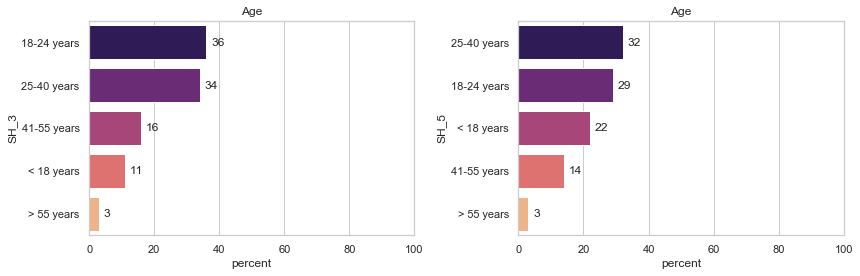

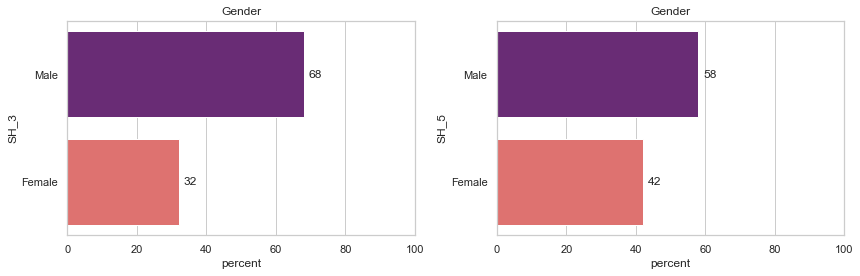

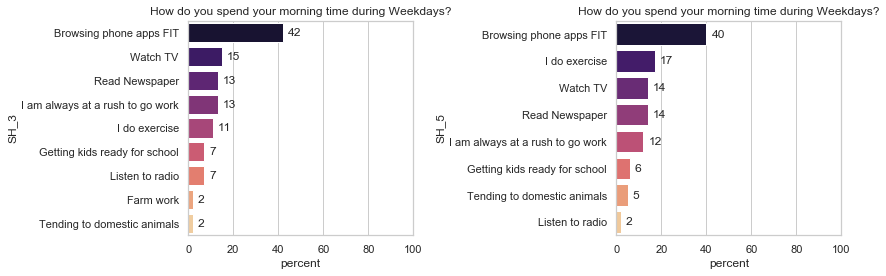

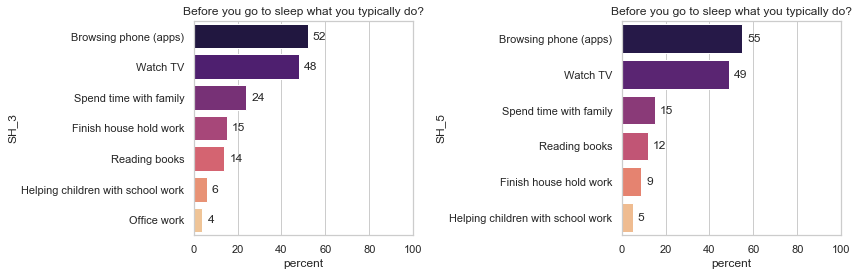

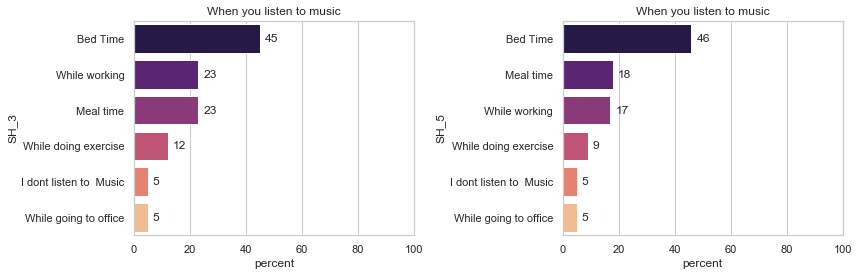

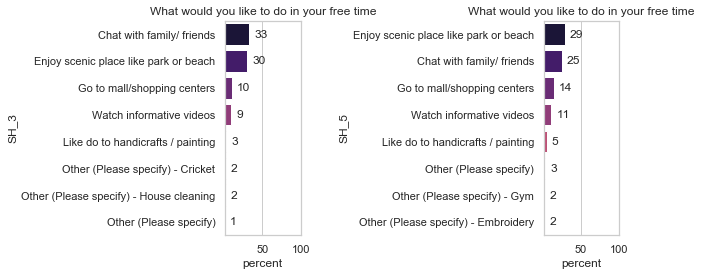

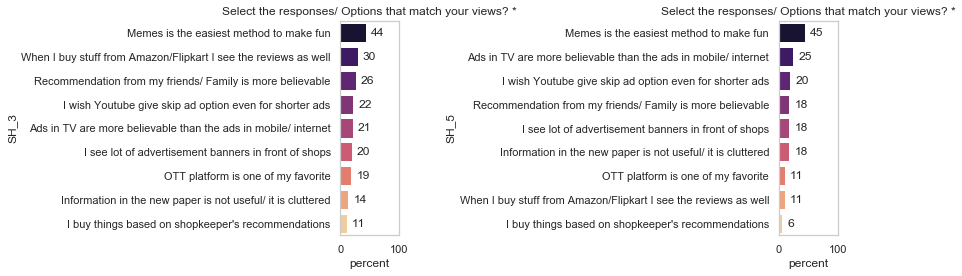

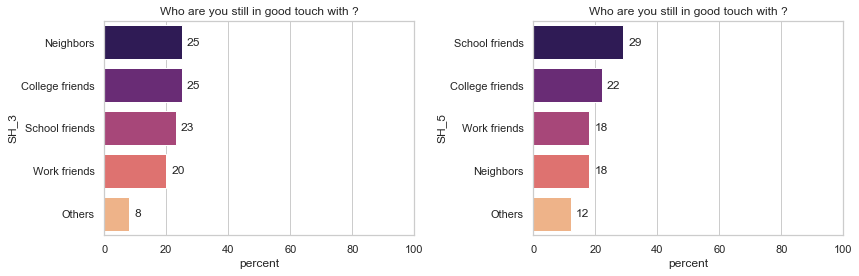

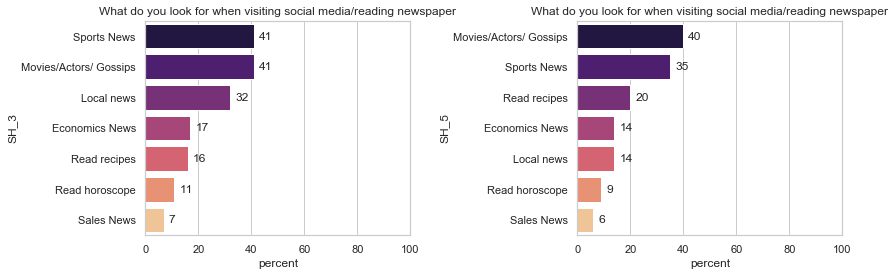

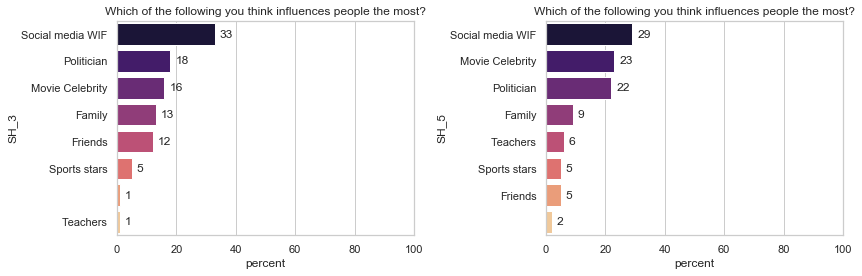

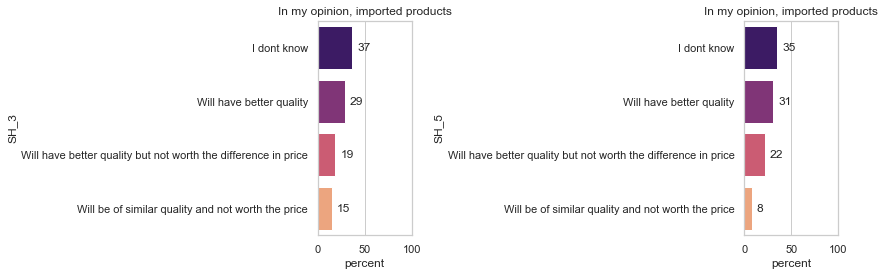

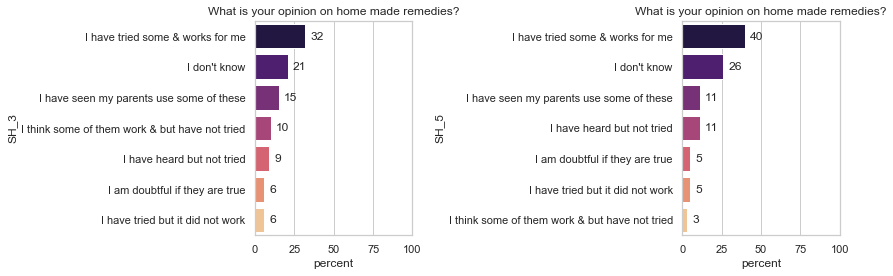

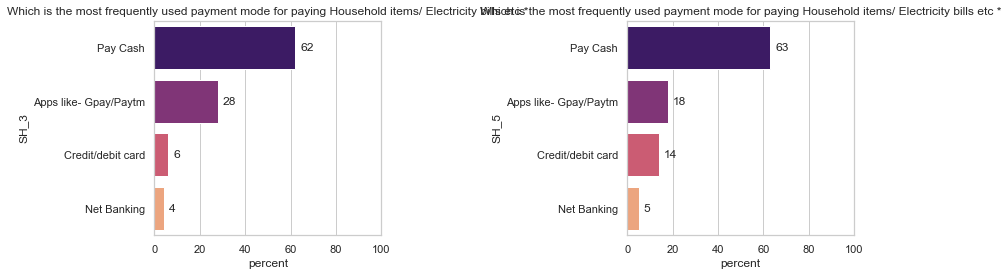

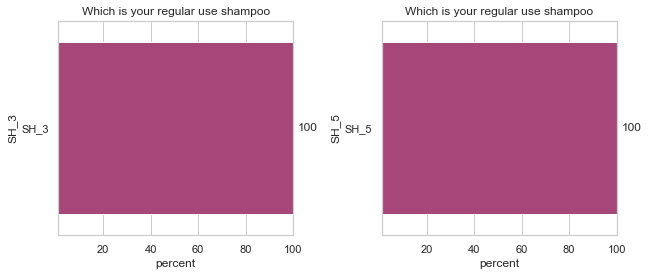

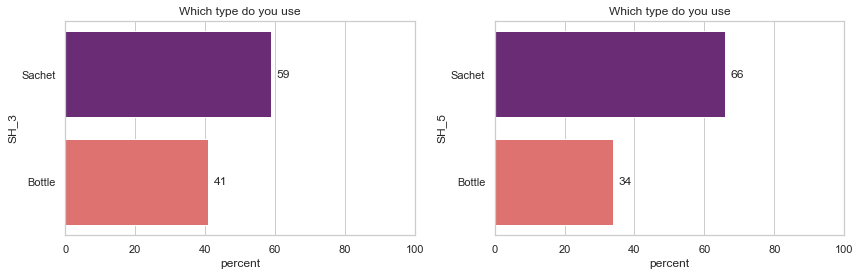

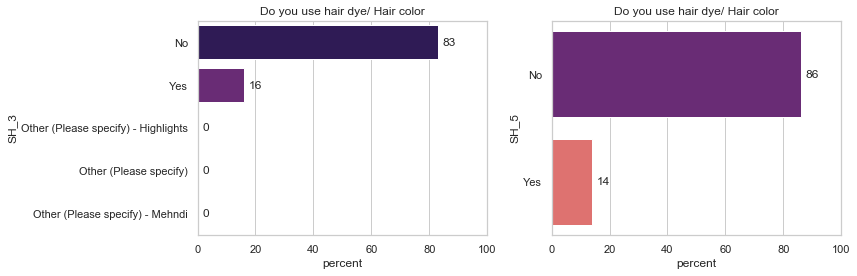

In [96]:
wholeagegroup_plot(data_1)

###### Age group of 18-24

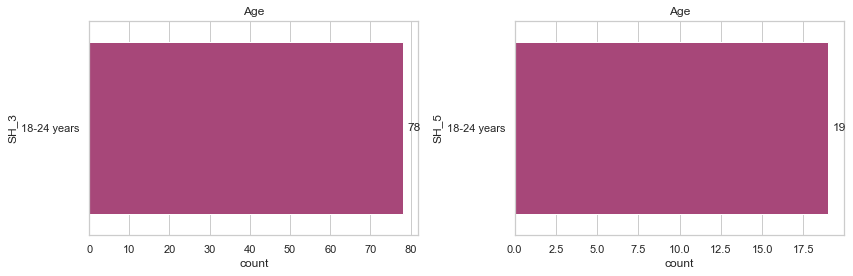

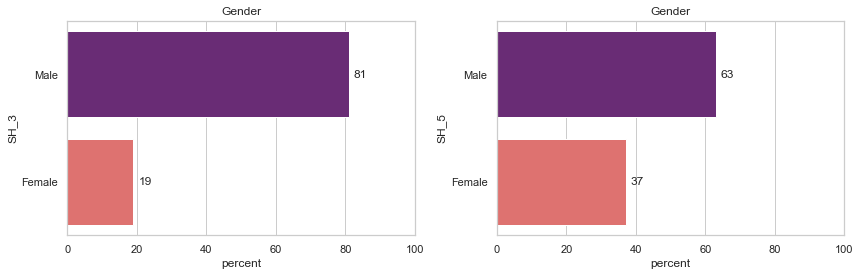

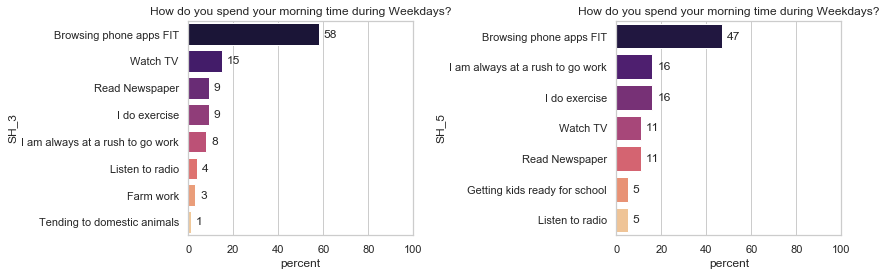

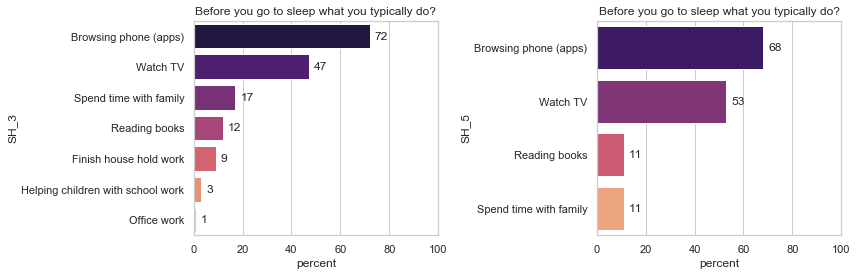

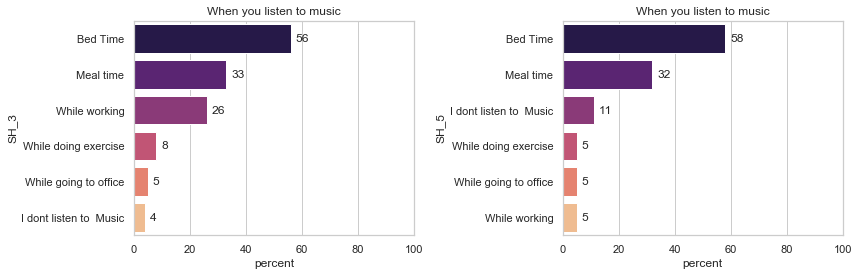

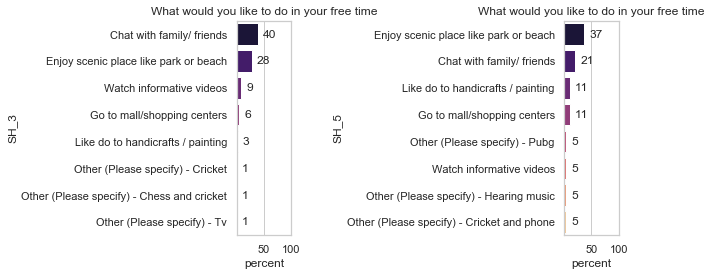

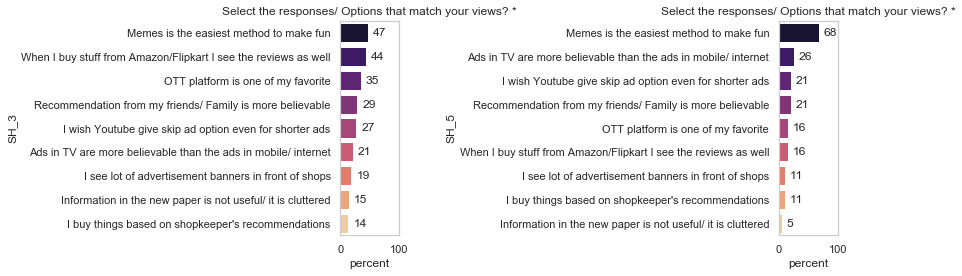

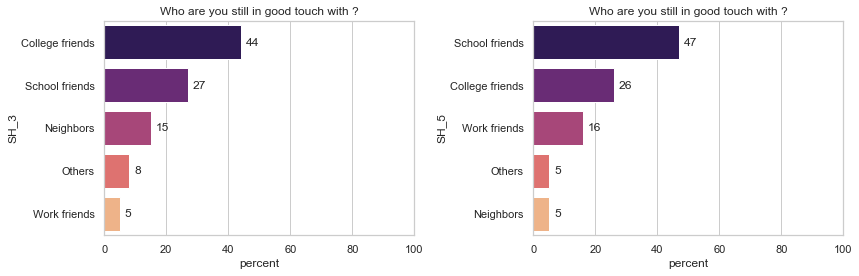

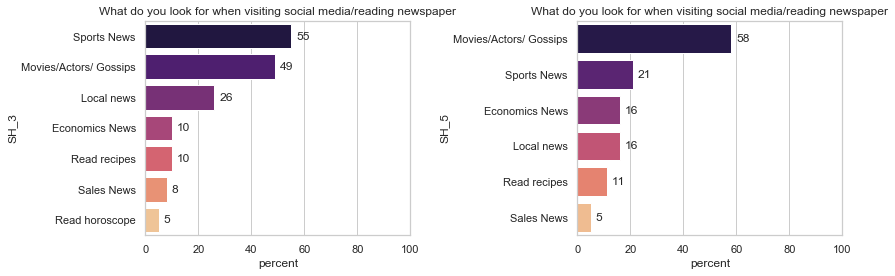

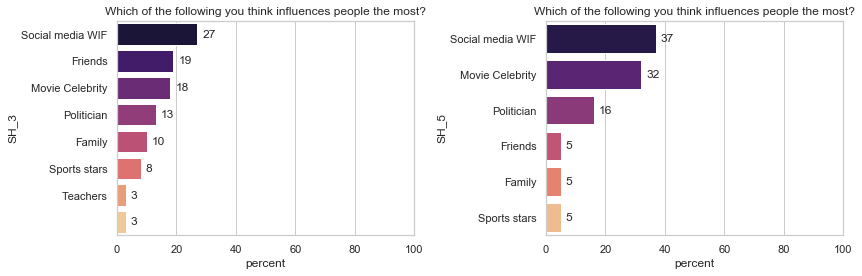

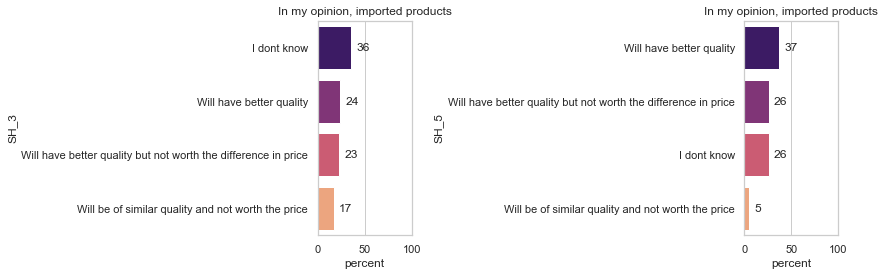

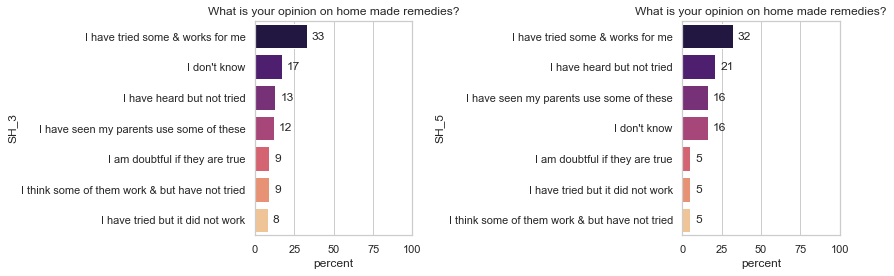

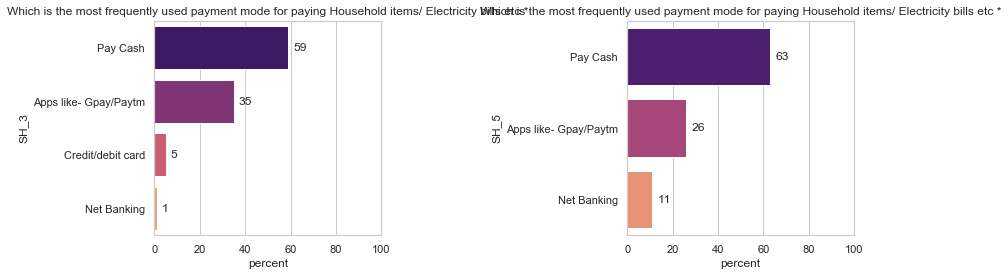

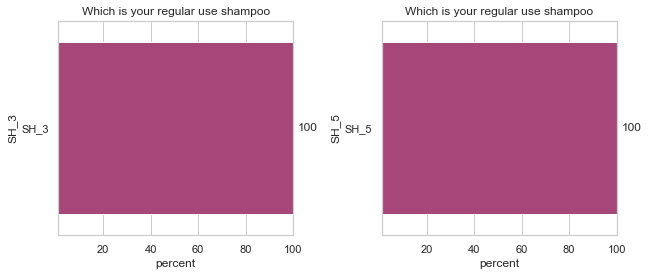

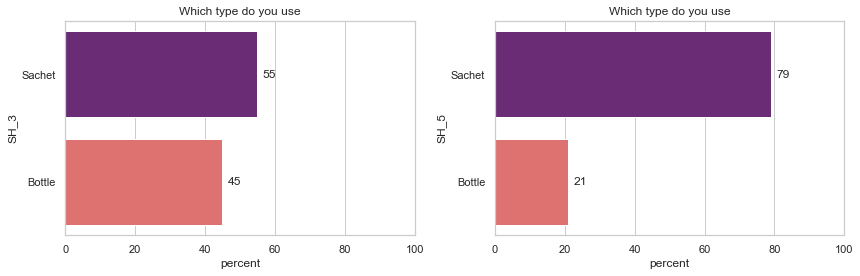

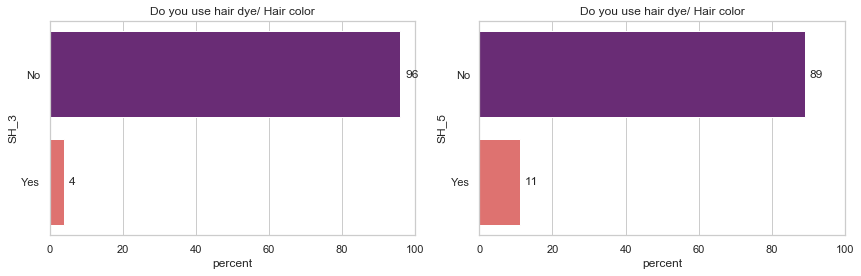

In [101]:
agegroup_plot(data_1,'18-24 years')

###### Age group of 25-40

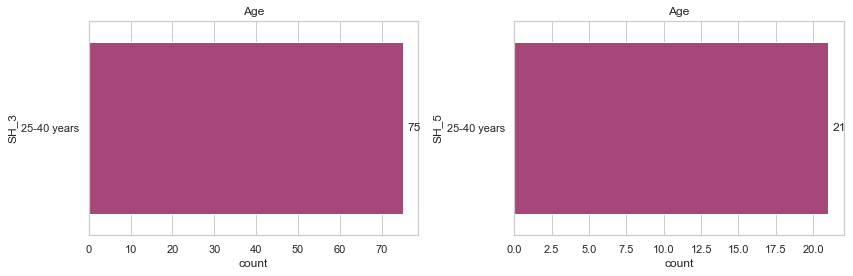

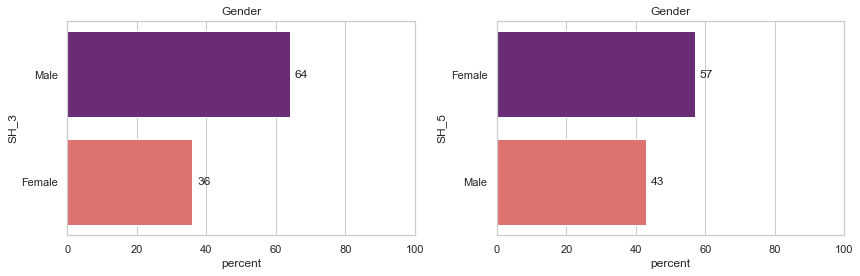

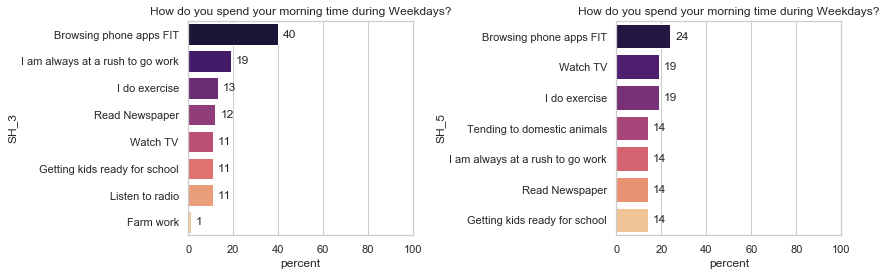

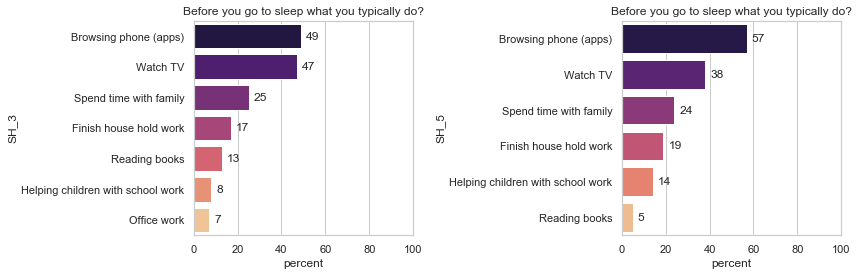

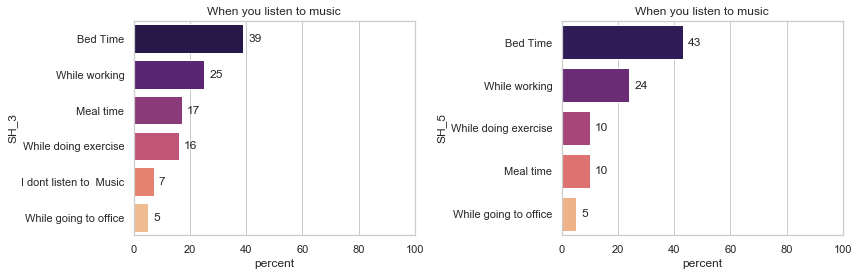

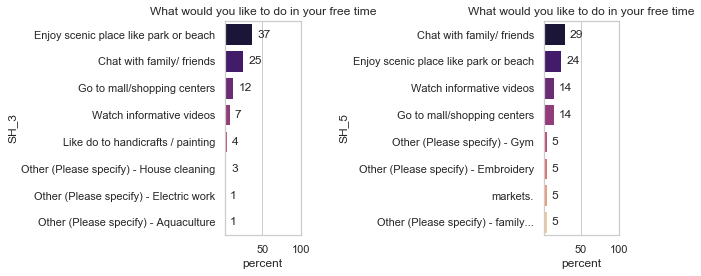

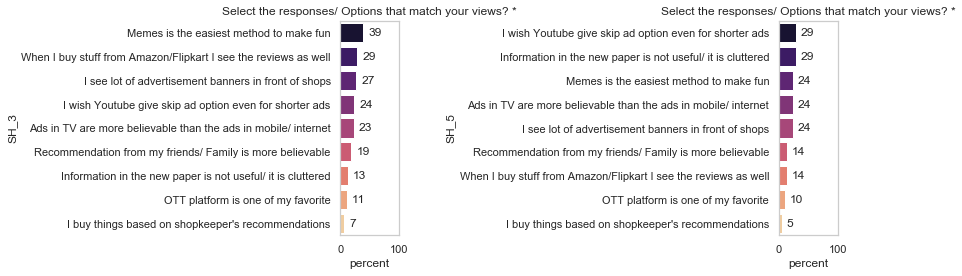

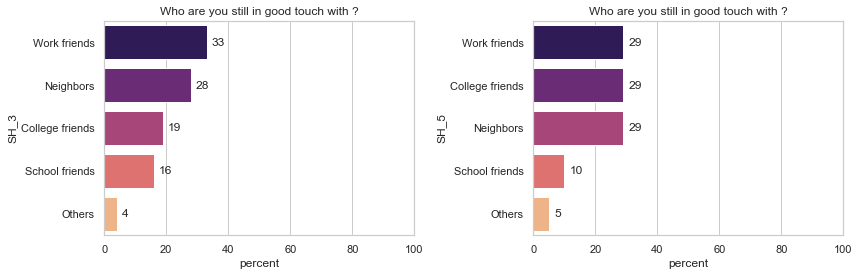

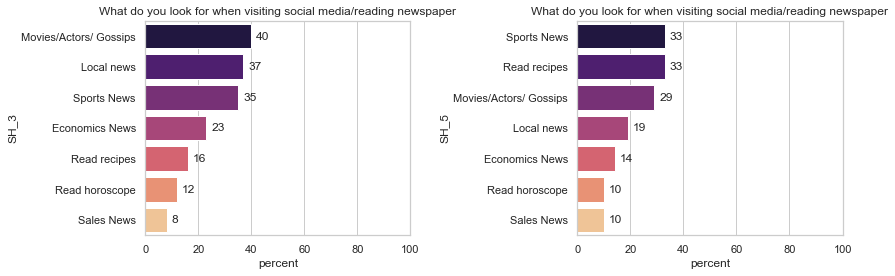

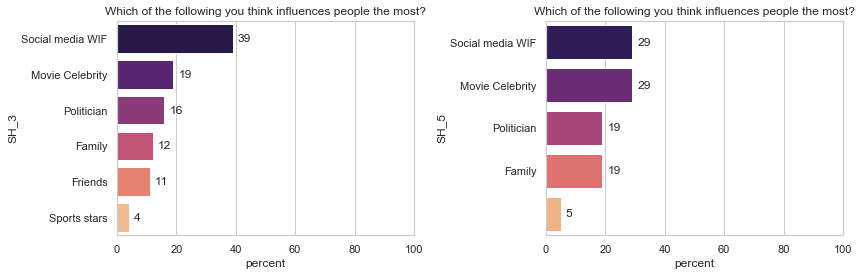

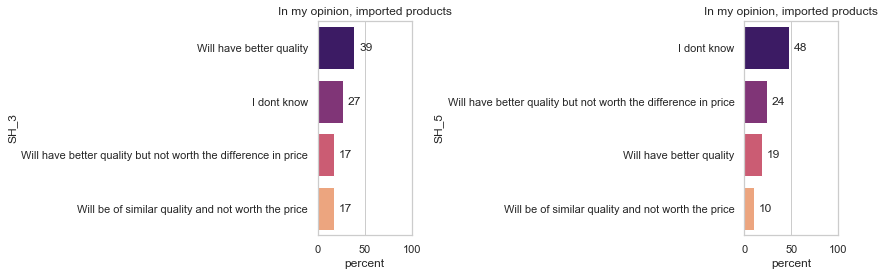

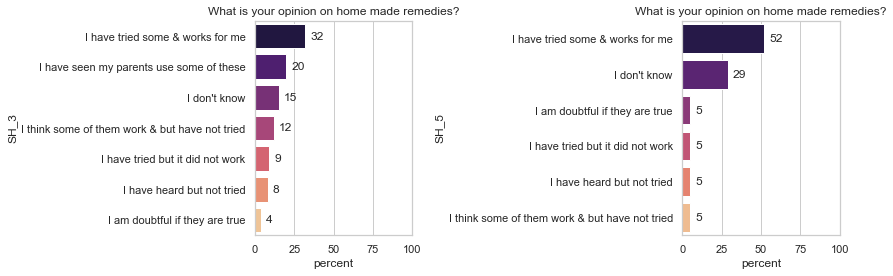

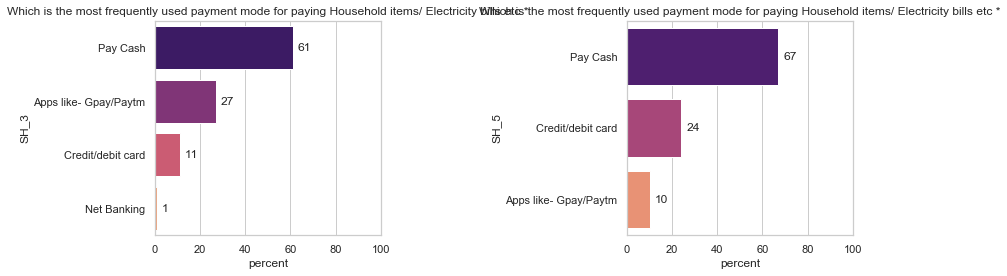

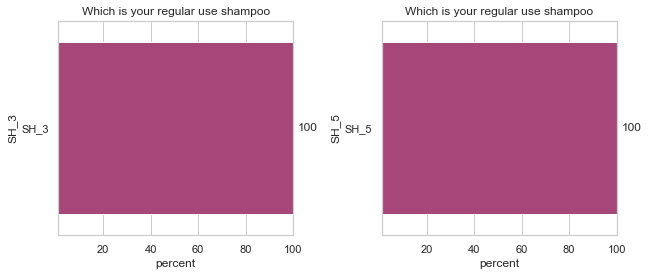

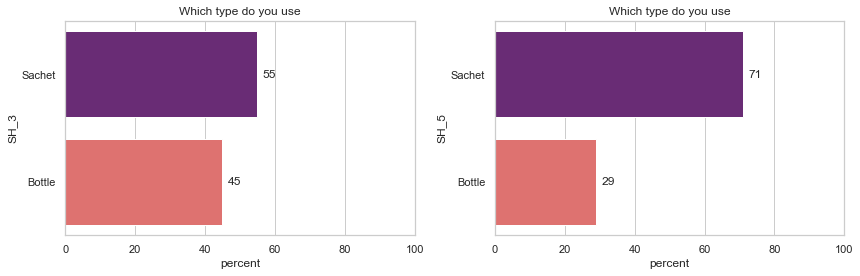

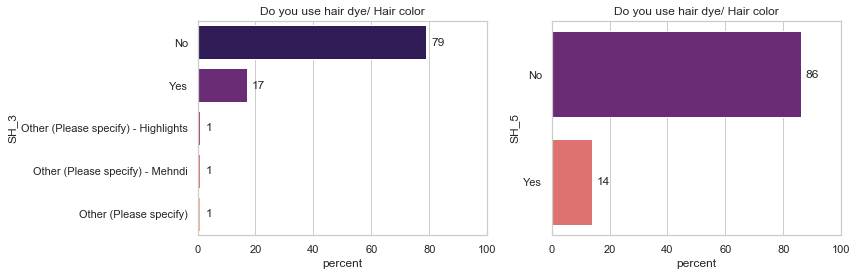

In [102]:
agegroup_plot(data_1,'25-40 years')

###### On Age group

In [118]:
al = data_1['Age'].unique().tolist()

In [120]:
al

['18-24 years', '25-40 years', '< 18 years', '41-55 years', '> 55 years']

In [124]:
order = [2,0,1,3,4]
al_list = [al[i] for i in order]
al_list

['< 18 years', '18-24 years', '25-40 years', '41-55 years', '> 55 years']

In [125]:
## Plot in grid

def subcategory_plot1(q):
    fig, axes = plt.subplots(ncols=2, nrows=3,figsize = (12,10))
    for i,ax in zip(al_list,axes.flat):
        view_list = data_1[(data_1['Age']==i)][q].str.split(',', expand=True)
        df_ga = (view_list.stack().value_counts()/len(view_list.index)).mul(100).round().reset_index(name='percent')
        #display(df_ga)
        try:
            # note how I put 'ax' here
            sns.barplot('percent','index',data=df_ga,ax=ax,palette="OrRd_r")

            for p in ax.patches:
                ax.annotate("%d" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
                        xytext=(5, 0), textcoords='offset points', ha="left", va="center")

            fig.tight_layout() #Improve subplot size/spacing with many subplots in matplotlib

            #ax.set_xlim(1,7)
            ax.set_ylabel(i)
        except ValueError:
            print('Data not present')

    axes.flat[-1].set_visible(False) # to remove last plot
    plt.show()

In [126]:
## Plot in grid
# Age with other subcategory
def subcategory_plot(subcatg,q):
    gender = subcatg
    fig, axes = plt.subplots(ncols=2, nrows=3,figsize = (12,10))
    for i,ax in zip(al_list,axes.flat):
        view_list = data_1[(data_1['Gender']== gender) & (data_1['Age']==i)][q].str.split(',', expand=True)
        df_ga = (view_list.stack().value_counts()/len(view_list.index)).mul(100).round().reset_index(name='percent')
        #display(df_ga)
        try:
            # note how I put 'ax' here
            sns.barplot('percent','index',data=df_ga,ax=ax,palette="OrRd_r")

            for p in ax.patches:
                ax.annotate("%d" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
                        xytext=(5, 0), textcoords='offset points', ha="left", va="center")

            fig.tight_layout() #Improve subplot size/spacing with many subplots in matplotlib

            #ax.set_xlim(1,7)
            ax.set_ylabel(gender+'  '+i)
        except ValueError:
            print('Data not present')

    axes.flat[-1].set_visible(False) # to remove last plot
    plt.show()

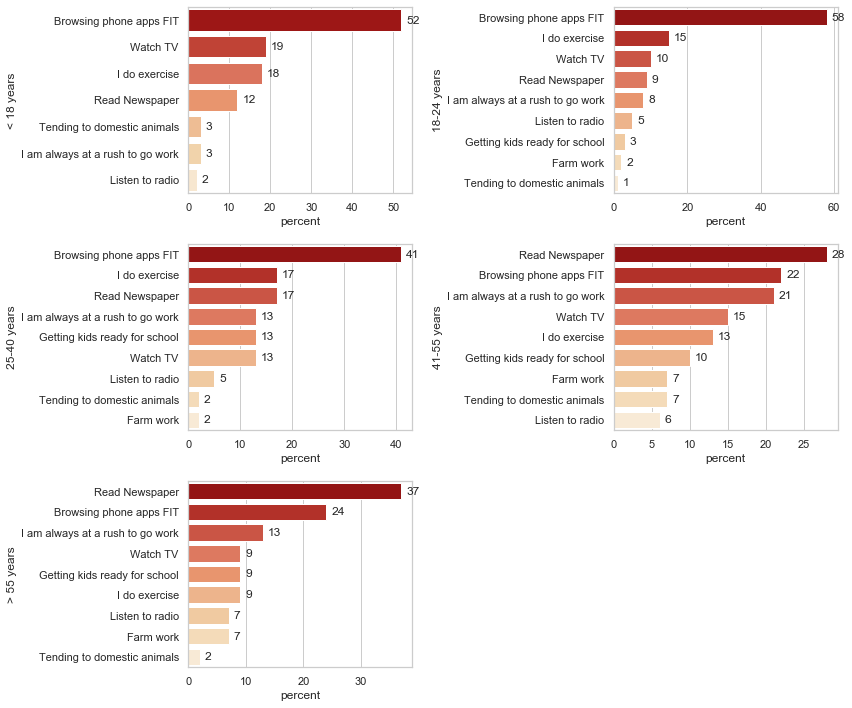

In [131]:
q = "How do you spend your morning time during Weekdays?"
subcategory_plot1(q)

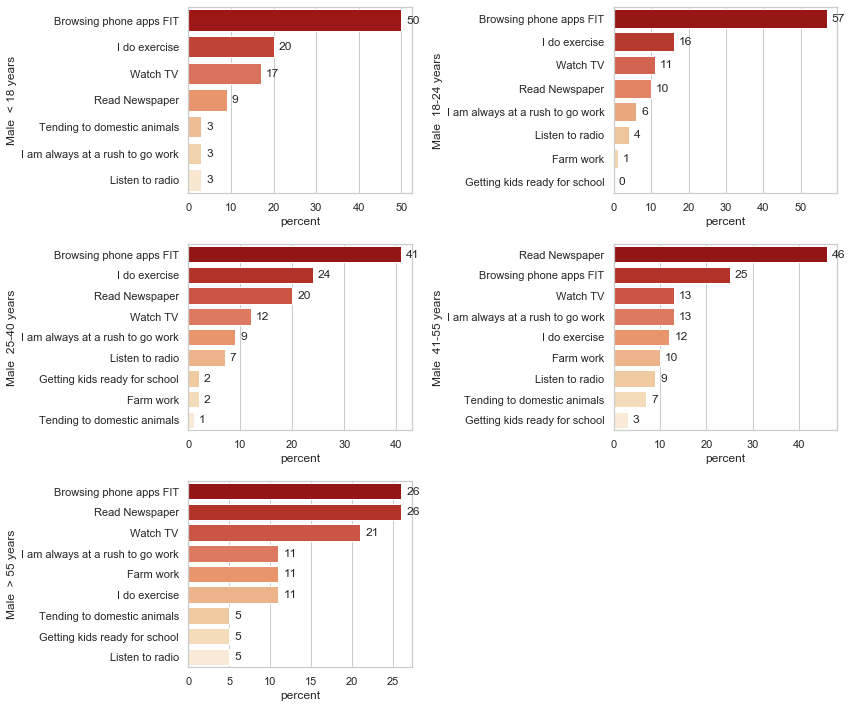

In [130]:
# With Gender subcategory
q = "How do you spend your morning time during Weekdays?"
subcategory_plot("Male",q)

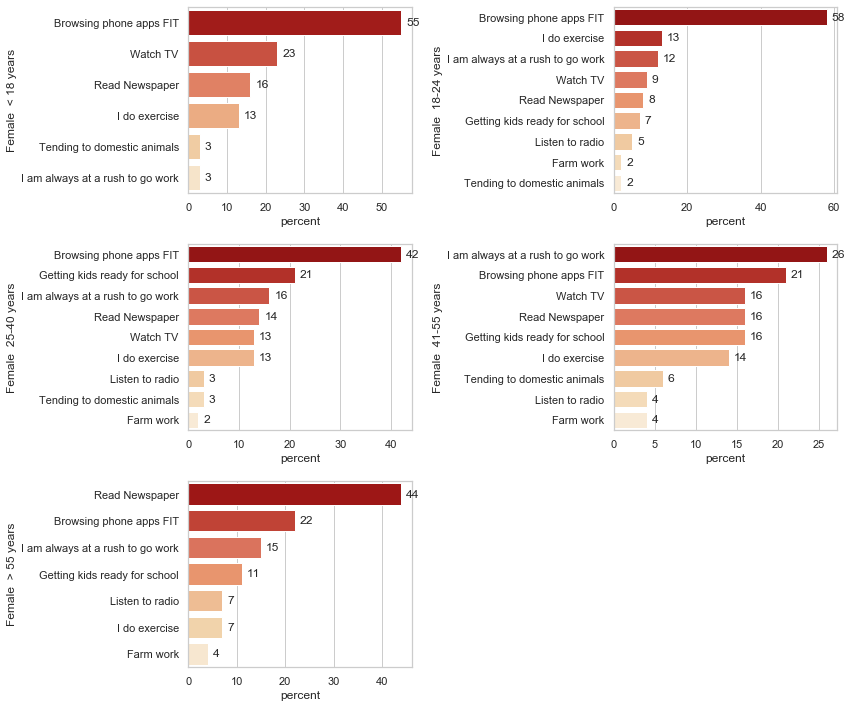

In [132]:
q = "How do you spend your morning time during Weekdays?"
subcategory_plot("Female",q)

**Sample insights from Direct Analysis**
* Demographics
    * SH_3 users in age 18-24 years is nearly 6% more than SH_5 users.


* Psychographics
    * Similar trend in influence by social media in about ~30% of people.
    * SH_5 users are more influence by movie celebrity/politician by SH_3 users.
    * Similar trend in listening to music generally, with nearly 45% of people listening during bedtime.
    * Before sleep, SH_3 users follow a similar trend in browsing phone, watching TV with SH_5 users.
    * SH_3 users listen to radio more than SH_5 users.
    * Similar trend in payment mode, with more affinity towards cash payments for SH_3 and SH_5 users.
    * SH_3 users use Online payment more than SH_5 users
    

* Behavioral
    * SH_3 & SH_5 users are less likely to use hair dye, with only 14-16% of people using hair dyes.
    * SH_3 & SH_5 users more likely to use sachet by about 60%.
    * SH_3 users use bottle more than SH_5 users by about 6%




### Cross Analysis

#### Correlation Analysis

 >  **Correlation analysis is a method of statistical evaluation used to study the strength of a relationship between two, numerically measured, continuous variables. Correlation is degree to which two variables move in relation to each other on scale on –1 to 1.**
 
 > Correlation between subresponses of various multiple response Qs can be found

In [133]:
a = data_1['How do you spend your morning time during Weekdays?'].str.get_dummies(sep=',')
b = data_1['Select the responses/ Options that match your views? *'].str.get_dummies(sep=',')
c = data_1['Before you go to sleep what you typically do?'].str.get_dummies(sep=',').rename(columns={'Watch TV':'Watch_TV'})
d = data_1['What do you look for when visiting social media/reading newspaper'].str.get_dummies(sep=',')

In [134]:
a0 = pd.get_dummies(data_1['Age'])
a1 = pd.get_dummies(data_1['Gender'])
a2 = pd.get_dummies(data_1['Which is the most frequently used payment mode for paying Household items/ Electricity bills etc *'])
a3 = pd.get_dummies(data_1['Which type do you use'])

In [136]:
ds = data_1.join(a0).join(a1).join(a2).join(a3).join(a).join(b).join(c).join(d)

In [137]:
ds.columns

Index(['Response_ID', 'Age', 'Gender', 'Which is your regular use shampoo',
       'Which type do you use', 'Do you use hair dye/ Hair color',
       'Which is the most frequently used payment mode for paying Household items/ Electricity bills etc *',
       'How do you spend your morning time during Weekdays?',
       'Select the responses/ Options that match your views? *',
       'Before you go to sleep what you typically do?',
       'Who are you still in good touch with ?',
       'Which of the following you think influences people the most?',
       'What do you look for when visiting social media/reading newspaper',
       'In my opinion, imported products',
       'What is your opinion on home made remedies?',
       'When you listen to music',
       'What would you like to do in your free time',
       'Do you use hair dye/ Hair color1', '18-24 years', '25-40 years',
       '41-55 years', '< 18 years', '> 55 years', 'Female', 'Male',
       'Apps like- Gpay/Paytm', 'Credit/de

In [139]:
ds1 = ds[['18-24 years', '25-40 years',
       '41-55 years', '< 18 years', '> 55 years', 'Female', 'Male',
       'Apps like- Gpay/Paytm', 'Credit/debit card', 'Net Banking', 'Pay Cash',
       'Bottle', 'Sachet', 'Browsing phone apps FIT', 'Farm work',
       'Getting kids ready for school', 'I am always at a rush to go work',
       'I do exercise', 'Listen to radio', 'Read Newspaper',
       'Tending to domestic animals', 'Watch TV',
       'Ads in TV are more believable than the ads in mobile/ internet',
       'I buy things based on shopkeeper\'s recommendations',
       'I see lot of advertisement banners in front of shops',
       'I wish Youtube give skip ad option even for shorter ads',
       'Information in the new paper is not useful/ it is cluttered',
       'Memes is the easiest method to make fun',
       'OTT platform is one of my favorite',
       'Recommendation from my friends/ Family is more believable',
       'When I buy stuff from Amazon/Flipkart I see the reviews as well',
       'Browsing phone (apps)', 'Finish house hold work',
       'Helping children with school work', 'Office work', 'Reading books',
       'Spend time with family', 'Watch_TV', 'Economics News', 'Local news',
       'Movies/Actors/ Gossips', 'Read horoscope', 'Read recipes',
       'Sales News', 'Sports News']]

In [140]:
ds1

,18-24 years,25-40 years,41-55 years,< 18 years,> 55 years,Female,Male,Apps like- Gpay/Paytm,Credit/debit card,Net Banking,...,Reading books,Spend time with family,Watch_TV,Economics News,Local news,Movies/Actors/ Gossips,Read horoscope,Read recipes,Sales News,Sports News
0,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,0,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,1,1,0,0,...,1,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1164,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,1,1,0,1,0,0
1165,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1166,0,0,1,0,0,1,0,0,1,0,...,0,0,1,1,1,0,0,0,0,0
1167,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [141]:
# get correlations
df_corr = ds1.corr()

###### Simple correlation Heatmap

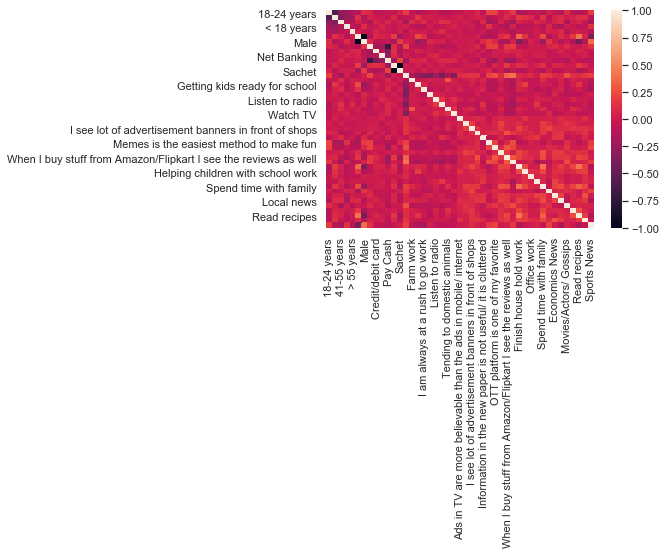

In [150]:
sns.heatmap(df_corr)

###### Correlation Heatmap

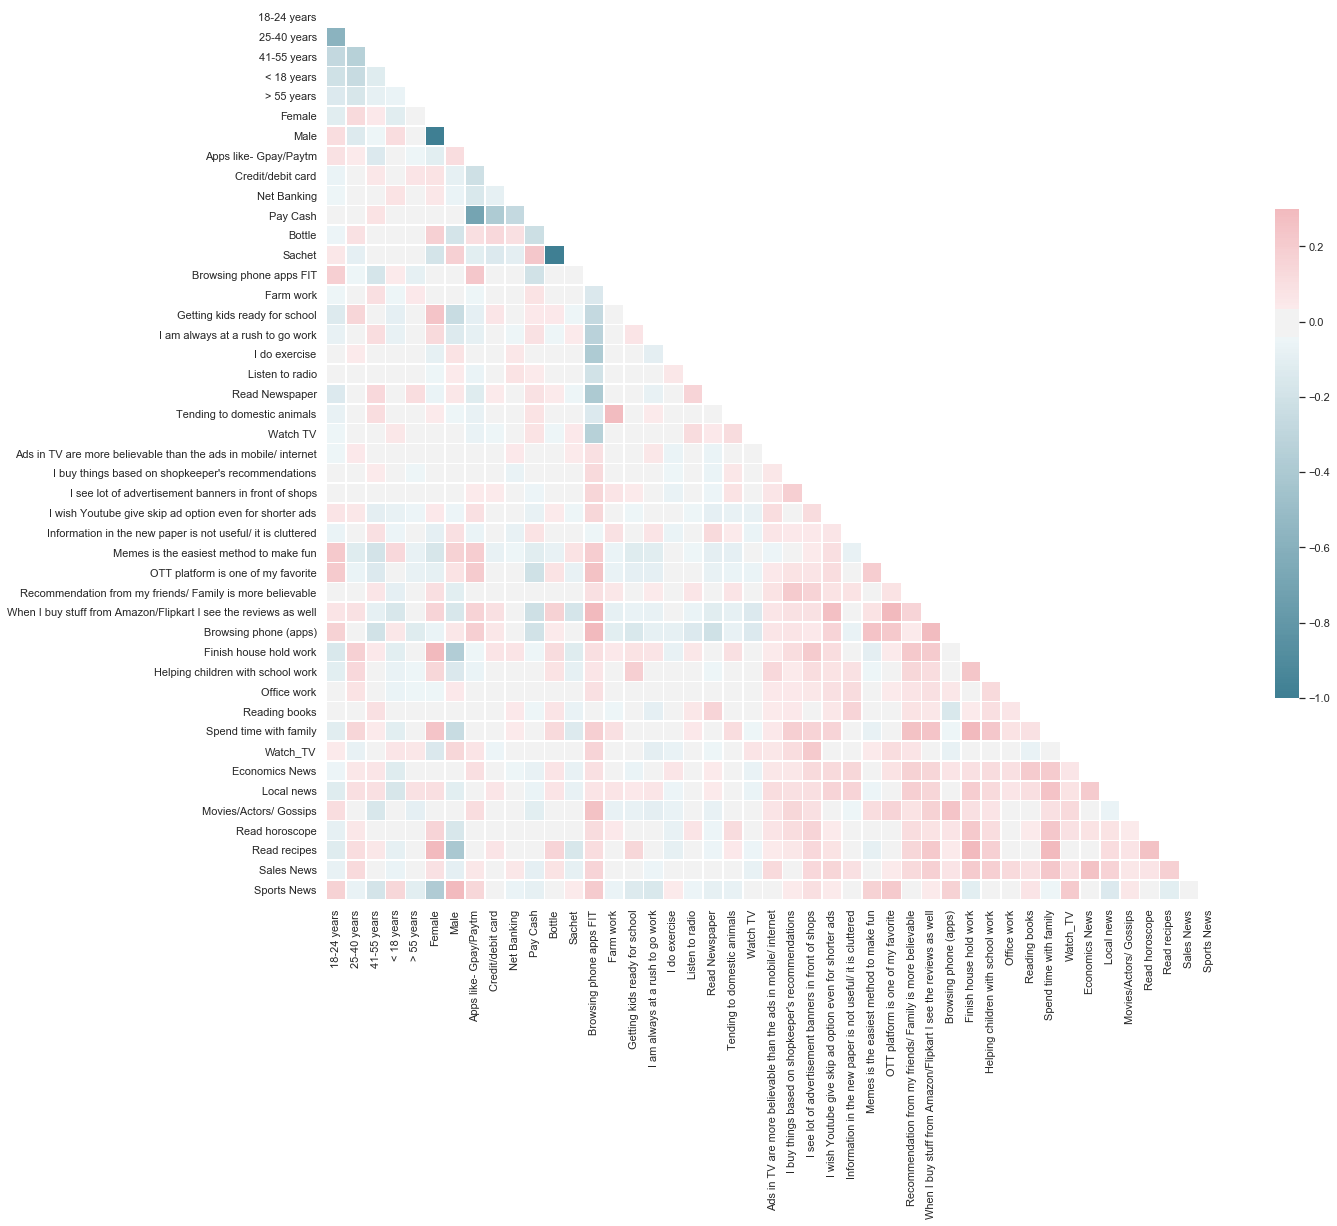

In [153]:
mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(20, 18))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(
    df_corr,
    mask=mask,
    cmap=cmap,
    vmax=.3,
    center=0,
    square=True,
    linewidths=.5,
    annot=False, # true to display correlation values
    cbar_kws={"shrink": .5})

###### Correlation heatmap with filtered correlation values

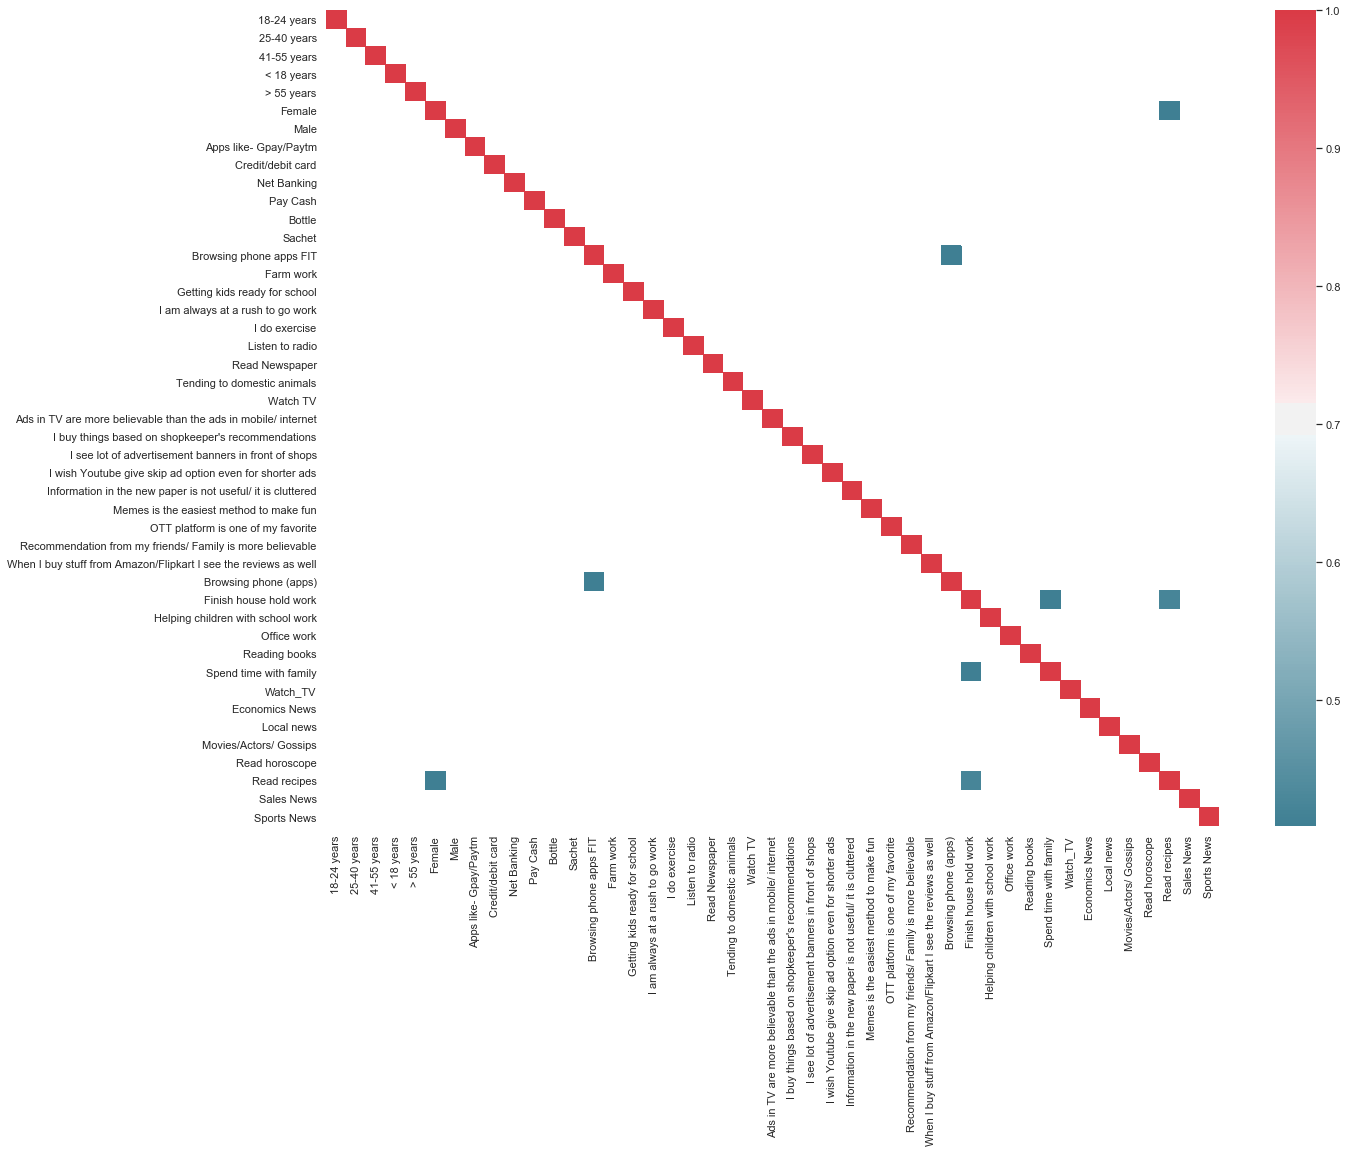

In [149]:
kot = df_corr[df_corr>0.4]
plt.figure(figsize=(20,15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(kot, cmap=cmap)

###### Top correlations in table

In [154]:
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

df_ci = df_corr.unstack().sort_values().drop_duplicates().reset_index(name='correlation_index')
dfci = df_ci[(df_ci['correlation_index']>0.35) | (df_ci['correlation_index']<-0.35) ].head(30)

dfci.style.background_gradient(cmap=cmap)

,level_0,level_1,correlation_index
0,Male,Female,-1.000000
1,Sachet,Bottle,-1.000000
2,Pay Cash,Apps like- Gpay/Paytm,-0.698351
3,18-24 years,25-40 years,-0.582215
4,Read recipes,Male,-0.408709
5,Browsing phone apps FIT,Read Newspaper,-0.390931
6,Pay Cash,Credit/debit card,-0.390321
7,Browsing phone apps FIT,I do exercise,-0.382298
8,Sports News,Female,-0.375708
9,Finish house hold work,Male,-0.364553


#### Correlation over list of categories

###### Correlation - On Shampoo brand

In [157]:
sl #Shampoo brands

['SH_3', 'SH_5']

In [166]:
for i in sl: 
    # get correlations
    dsg = ds[(ds['Which is your regular use shampoo']==i)]
    ds1 = dsg[['18-24 years', '25-40 years', '41-55 years', '< 18 years',
       '> 55 years', 'Female', 'Male', 'Apps like- Gpay/Paytm',
       'Credit/debit card', 'Net Banking', 'Pay Cash', 'Bottle', 'Sachet',
       'Browsing phone apps FIT', 'Farm work', 'Getting kids ready for school',
       'I am always at a rush to go work', 'I do exercise', 'Listen to radio',
       'Read Newspaper', 'Tending to domestic animals', 'Watch TV',
       'Ads in TV are more believable than the ads in mobile/ internet',
       'I buy things based on shopkeeper\'s recommendations',
       'I see lot of advertisement banners in front of shops',
       'I wish Youtube give skip ad option even for shorter ads',
       'Information in the new paper is not useful/ it is cluttered',
       'Memes is the easiest method to make fun',
       'OTT platform is one of my favorite',
       'Recommendation from my friends/ Family is more believable',
       'When I buy stuff from Amazon/Flipkart I see the reviews as well',
       'Browsing phone (apps)', 'Finish house hold work',
       'Helping children with school work', 'Office work', 'Reading books',
       'Spend time with family', 'Watch_TV', 'Economics News', 'Local news',
       'Movies/Actors/ Gossips', 'Read horoscope', 'Read recipes',
       'Sales News', 'Sports News']]
    df_corr = ds1.corr()

    df_ci = df_corr.unstack().sort_values().drop_duplicates().reset_index(name='correlation_index')

    df1_ci = df_ci[(df_ci['correlation_index']>0.35) | (df_ci['correlation_index']<-0.35) ].head(30)
    df1_ci['Investigation'] = i

    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

    display(df1_ci.style.background_gradient(cmap=cmap))

,level_0,level_1,correlation_index,Investigation
0,Female,Male,-1.000000,SH_3
1,Bottle,Sachet,-1.000000,SH_3
2,Apps like- Gpay/Paytm,Pay Cash,-0.795366,SH_3
3,18-24 years,25-40 years,-0.536769,SH_3
4,Getting kids ready for school,Male,-0.395617,SH_3
5,Male,Read recipes,-0.369097,SH_3
6,Sports News,Female,-0.367767,SH_3
7,Browsing phone apps FIT,Watch TV,-0.361873,SH_3
8,Sports News,Local news,-0.361052,SH_3
976,OTT platform is one of my favorite,Browsing phone (apps),0.366875,SH_3


,level_0,level_1,correlation_index,Investigation
0,Sachet,Bottle,-1.000000,SH_5
1,Female,Male,-1.000000,SH_5
2,Apps like- Gpay/Paytm,Pay Cash,-0.621926,SH_5
3,Pay Cash,Credit/debit card,-0.523979,SH_5
4,Browsing phone (apps),41-55 years,-0.446663,SH_5
5,25-40 years,18-24 years,-0.443998,SH_5
6,Memes is the easiest method to make fun,Information in the new paper is not useful/ it is cluttered,-0.427071,SH_5
7,Memes is the easiest method to make fun,Pay Cash,-0.403530,SH_5
8,Finish house hold work,Male,-0.378320,SH_5
9,I do exercise,Browsing phone apps FIT,-0.368514,SH_5


Observed Few correlations...
* Browse apps = Read  Ecommerce reviews, Watch OTT
* People reading recipes = Spend time with family, Getting kids ready
* Local news readers = Read ad banners in front of shops
* People > age 40 = Read books 
* Browse mobile = Look for movie/actors/gossips
* Radio listeners = Getting shopkeeper recommendation 

* Browsing mobile != Watching TV 
* Female != Sport news
* Browsing mobile != 41-55 years
* 25-40 years != 18-24 years
* ......................



###### Correlation - On Brand of Shampoo & Age group

In [168]:
al = ['25-40 years','18-24 years']

a = data_1['How do you spend your morning time during Weekdays?'].str.get_dummies(sep=',')
b = data_1['Select the responses/ Options that match your views? *'].str.get_dummies(sep=',')
c = data_1['Before you go to sleep what you typically do?'].str.get_dummies(sep=',').rename(columns={'Watch TV':'Watch_TV'})
d = data_1['What do you look for when visiting social media/reading newspaper'].str.get_dummies(sep=',')

a0 = pd.get_dummies(data_1['Age'])
a1 = pd.get_dummies(data_1['Gender'])
a2 = pd.get_dummies(data_1['Which is the most frequently used payment mode for paying Household items/ Electricity bills etc *'])
a3 = pd.get_dummies(data_1['Which type do you use'])

ds = data_1.join(a0).join(a1).join(a2).join(a3).join(a).join(b).join(c).join(d)

# get correlations

for i in sl: 
    # get correlations    
    dsg = ds[(ds['Age'].isin(al)) & (ds['Which is your regular use shampoo']== i)]

    ds1 = dsg[['18-24 years', '25-40 years', '41-55 years', '< 18 years',
       '> 55 years', 'Female', 'Male', 'Apps like- Gpay/Paytm',
       'Credit/debit card', 'Net Banking', 'Pay Cash', 'Bottle', 'Sachet',
       'Browsing phone apps FIT', 'Farm work', 'Getting kids ready for school',
       'I am always at a rush to go work', 'I do exercise', 'Listen to radio',
       'Read Newspaper', 'Tending to domestic animals', 'Watch TV',
       'Ads in TV are more believable than the ads in mobile/ internet',
       'I buy things based on shopkeeper\'s recommendations',
       'I see lot of advertisement banners in front of shops',
       'I wish Youtube give skip ad option even for shorter ads',
       'Information in the new paper is not useful/ it is cluttered',
       'Memes is the easiest method to make fun',
       'OTT platform is one of my favorite',
       'Recommendation from my friends/ Family is more believable',
       'When I buy stuff from Amazon/Flipkart I see the reviews as well',
       'Browsing phone (apps)', 'Finish house hold work',
       'Helping children with school work', 'Office work', 'Reading books',
       'Spend time with family', 'Watch_TV', 'Economics News', 'Local news',
       'Movies/Actors/ Gossips', 'Read horoscope', 'Read recipes',
       'Sales News', 'Sports News']]
    df_corr = ds1.corr()

    df_ci = df_corr.unstack().sort_values().drop_duplicates().reset_index(name='correlation_index')

    df1_ci = df_ci[(df_ci['correlation_index']>0.35) | (df_ci['correlation_index']<-0.35) ].head(30)
    i1 =  i + ' 18-40'

    df1_ci['Investigation'] = i1

    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

    display(df1_ci.style.background_gradient(cmap=cmap))

,level_0,level_1,correlation_index,Investigation
0,Bottle,Sachet,-1.000000,SH_3 18-40
1,18-24 years,25-40 years,-1.000000,SH_3 18-40
2,Pay Cash,Apps like- Gpay/Paytm,-0.817758,SH_3 18-40
3,Sports News,Female,-0.410337,SH_3 18-40
4,Male,Getting kids ready for school,-0.381854,SH_3 18-40
5,Browsing phone apps FIT,I am always at a rush to go work,-0.380253,SH_3 18-40
6,Browsing phone apps FIT,Watch TV,-0.380253,SH_3 18-40
7,Credit/debit card,Pay Cash,-0.358270,SH_3 18-40
8,Local news,Sports News,-0.358015,SH_3 18-40
9,Pay Cash,OTT platform is one of my favorite,-0.351037,SH_3 18-40


,level_0,level_1,correlation_index,Investigation
0,18-24 years,25-40 years,-1.000000,SH_5 18-40
1,Sachet,Bottle,-1.000000,SH_5 18-40
2,Apps like- Gpay/Paytm,Pay Cash,-0.627646,SH_5 18-40
3,Pay Cash,Credit/debit card,-0.515079,SH_5 18-40
4,Memes is the easiest method to make fun,25-40 years,-0.447802,SH_5 18-40
5,I am always at a rush to go work,Male,-0.441641,SH_5 18-40
6,Pay Cash,When I buy stuff from Amazon/Flipkart I see the reviews as well,-0.425689,SH_5 18-40
7,Information in the new paper is not useful/ it is cluttered,Memes is the easiest method to make fun,-0.416598,SH_5 18-40
8,Sachet,Net Banking,-0.397360,SH_5 18-40
9,Pay Cash,Memes is the easiest method to make fun,-0.389819,SH_5 18-40


#### Correspondence Analysis

> **Correspondence analysis reveals the relative relationships between and within two groups of variables.**Inferred that CA is better if there are two or more categorical variables.

In [169]:
# Crosstabulation of two categorical columns
pd.crosstab(data_1['Gender'], data_1['Age'], dropna=True)

Age,18-24 years,25-40 years,41-55 years,< 18 years,> 55 years
Gender,,,,,
Female,166,289,96,31,27
Male,213,195,69,64,19


###### Correspondence analysis of Brand Vs Dye usage

In [180]:
df = pd.crosstab(data_1['Which is your regular use shampoo'], data_1['Do you use hair dye/ Hair color1'])
idx = df.columns.union(df.index)
df = df.reindex(index = idx, columns=idx, fill_value=0)

In [181]:
df = df.loc[:, (df != 0).any(axis=0)] # remove columns with all zeros
df = df.loc[~(df==0).all(axis=1)]  # remove rows with all zeros

In [182]:
# Cross tabluation
df

,No,Others_dye,Yes
Others,56,3,16
SH_1,32,1,21
SH_10,11,1,2
SH_11,74,2,56
SH_12,48,1,5
SH_13,13,0,10
SH_14,21,1,33
SH_15,102,1,41
SH_16,78,0,22
SH_17,26,0,9


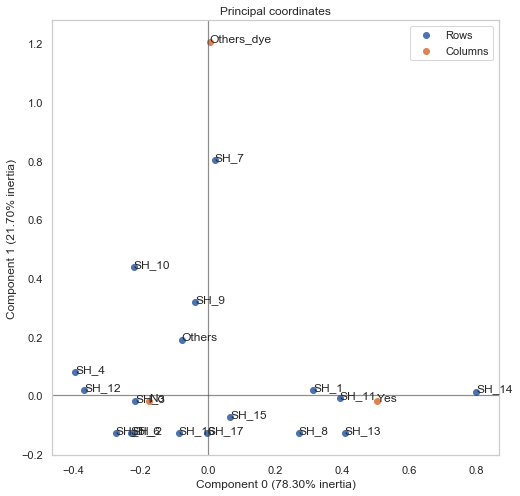

In [174]:
ca = prince.CA()
ca.fit(df)

try:
    ca.plot_coordinates(df
                    ,figsize=(8, 8)
                    ,x_component=0
                    ,y_component=1
                    ,show_row_labels=True
                    ,show_col_labels=True
                    )
except ZeroDivisionError:
    z = 0

Observing from the graph, & from the clusters
* SH_4, SH_12, SH_3 unlikely to use dye
* SH_1, SH_11, SH_8, SH_13 likely to use dye.

###### Function for Correspondence analysis

In [175]:
def correspondence(c1,c2,data):
    df = pd.crosstab(data[c1], data[c2])
    idx = df.columns.union(df.index)
    df = df.reindex(index = idx, columns=idx, fill_value=0)

    df = df.loc[:, (df != 0).any(axis=0)] # remove columns with all zeros
    df = df.loc[~(df==0).all(axis=1)]  # remove rows with all zeros

    ca = prince.CA()
    ca.fit(df)

    try:
        ca.plot_coordinates(df
                        ,figsize=(10, 10)
                        ,x_component=0
                        ,y_component=1
                        ,show_row_labels=True
                        ,show_col_labels=True
                        )
    except ZeroDivisionError:
        z = 0

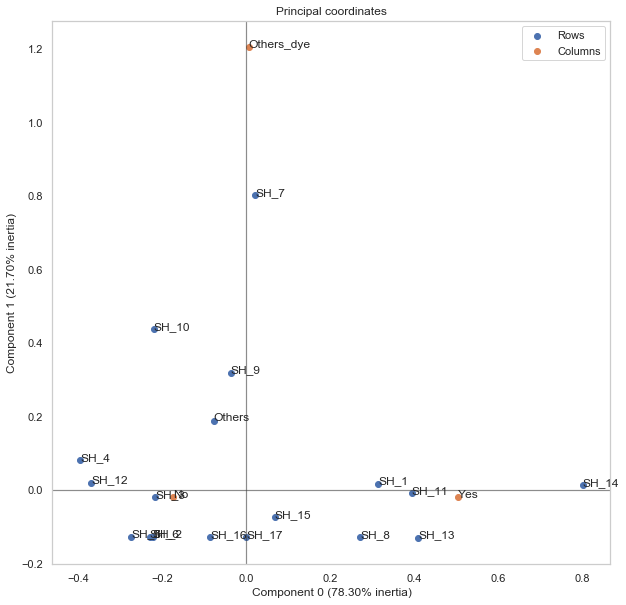

In [177]:
correspondence('Which is your regular use shampoo','Do you use hair dye/ Hair color1',data_1)

Usage of dye across Shampoo users
* SH_4, SH_12, SH_3 unlikely to use dye
* SH_1, SH_11, SH_8, SH_13 likely to use dye.

###### Correspondence analysis of Brand Vs Age 

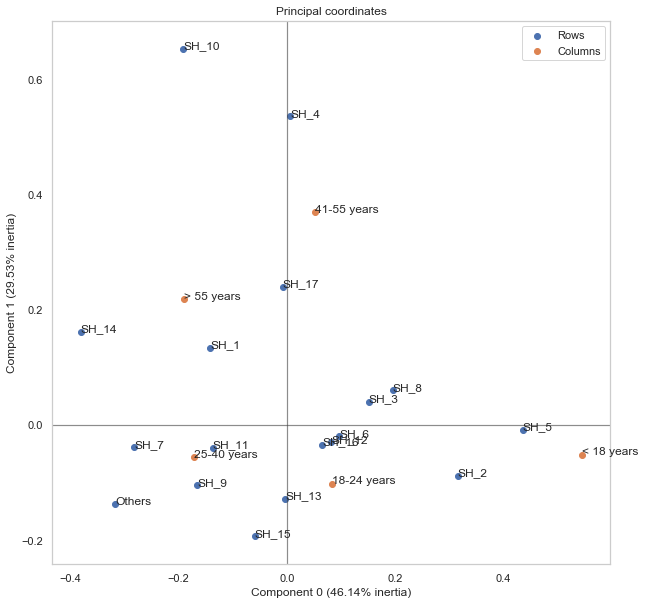

In [178]:
correspondence('Which is your regular use shampoo','Age',data_1)

Usage of shampoo across age groups(relatively)
* Age group 18-24: SH_13, SH_6, SH_16
* Age group 25-40: SH_7, SH_11, SH_9
* Age group >55: SH_1, SH_14, SH_17

###### Correspondence analysis of Brand Vs Influence

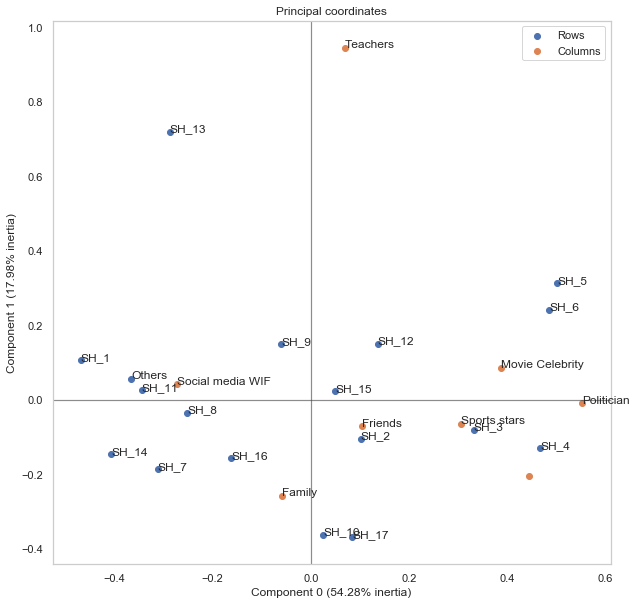

In [179]:
correspondence('Which is your regular use shampoo','Which of the following you think influences people the most?',data_1)

Influence of shampoo consumers (relatively)
* Social media: SH_1, SH_8, SH_11 
* Friends: SH_2, SH_15
* Sport stars: SH_3, SH_4
......


### References

> **Reading**

1. Correspondence Analysis Versus Multiple Correspondence Analysis - https://www.displayr.com/correspondence-analysis-versus-multiple-correspondence-analysis-use/

1. Interpret Correspondence Analysis Plots - https://www.displayr.com/interpret-correspondence-analysis-plots-probably-isnt-way-think/

1. Prince, A Python factor analysis library  - https://github.com/MaxHalford/prince#correspondence-analysis-ca

> **Tutorial**

1. Analyze Survey Data With Python - https://towardsdatascience.com/how-to-analyze-survey-data-with-python-84eff9cc9568


> **Github**

1. Market-Structure-Analysis-using-Online-customer-reviews - https://github.com/AtulJoshi1/Market-Structure-Analysis-using-Online-customer-reviews
1. Analyze Survey Data With Python - https://github.com/bd317/surveydata_with_python/blob/master/Github_Survey_Data_Upload.ipynb
1. Employee exit survey - https://github.com/pruittbl/Employee-Exit-Surveys/blob/master/Basics.ipynb


> **Links**

* Create condition column based on Search string - https://stackoverflow.com/questions/54135085/create-new-column-based-on-string
* Replace whole string if it contains substring in pandas - https://stackoverflow.com/questions/39768547/replace-whole-string-if-it-contains-substring-in-pandas
* One hot encoding - Get dummies - https://stackoverflow.com/questions/20162926/process-multiple-answer-questionnaire-from-google-forms-results-with-pandas
* Analyze Survey Data with Python for Beginners - https://www.dataquest.io/blog/how-to-analyze-survey-data-python-beginner/
* Reorder a list  - https://stackoverflow.com/questions/2177590/how-can-i-reorder-a-list/2177607
* List Highest Correlation Pairs from a Large Correlation Matrix in Pandas - https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas#:~:text=You%20can%20use%20DataFrame.,get%20the%20most%20correlated%20pairs.&text=Use%20the%20code%20below%20to%20view%20the%20correlations%20in%20the%20descending%20order.&text=You%20can%20do%20graphically%20according,code%20by%20substituting%20your%20data